In [996]:
import pandas as pd
import datetime as dt
import dataframe_image as dfi
from pandas_profiling import ProfileReport

Pandas backend loaded 1.3.1
Numpy backend loaded 1.18.1
Pyspark backend loaded 3.2.0
Python backend loaded


In [926]:
WIKI_URL = 'https://en.wikipedia.org/wiki/IPhone'
dfs = pd.read_html(WIKI_URL)

In [927]:
print(f'Total tables: {len(dfs)}')

Total tables: 26


In [928]:
table_iphone = pd.read_html('https://en.wikipedia.org/wiki/IPhone', match='Operating system support', header=2)
len(table_iphone)
df = table_iphone[0]
df.columns

Index(['model', 'with OS', 'date', 'discontinued', 'ended', 'final OS', 'max',
       'min', 'launch price ($US)'],
      dtype='object')

In [929]:
df.reset_index().head()

,index,model,with OS,date,discontinued,ended,final OS,max,min,launch price ($US)
0,0,iPhone,iPhone OS 1.0,"June 29, 2007","June 9, 2008","June 20, 2010",iPhone OS 3.1.3,"2 years, 11 months",2 years,$499/$599*
1,1,iPhone 3G,iPhone OS 2.0,"July 11, 2008","August 9, 2010","March 3, 2011",iOS 4.2.1,"2 years, 7 months",6 months,$199/$299*$599/$699
2,2,iPhone 3GS,iPhone OS 3.0,"June 19, 2009","September 12, 2012","September 18, 2013",iOS 6.1.6,"4 years, 2 months",1 year,$199/$299*$599/$699
3,3,iPhone 4,iOS 4.0,"June 24, 2010","September 10, 2013","September 17, 2014",iOS 7.1.2,"4 years, 2 months",1 year,$199/$299*$599/$699
4,4,iPhone 4S,iOS 5.0,"October 14, 2011","September 9, 2014","September 12, 2016(late, single update: July 22, 2019",iOS 9.3.5(9.3.6),"4 years, 10 months",2 years,$199/$299/$399*$649/$749/$849


In [930]:
df.reset_index().iloc[:,:]

,index,model,with OS,date,discontinued,ended,final OS,max,min,launch price ($US)
0,0,iPhone,iPhone OS 1.0,"June 29, 2007","June 9, 2008","June 20, 2010",iPhone OS 3.1.3,"2 years, 11 months",2 years,$499/$599*
1,1,iPhone 3G,iPhone OS 2.0,"July 11, 2008","August 9, 2010","March 3, 2011",iOS 4.2.1,"2 years, 7 months",6 months,$199/$299*$599/$699
2,2,iPhone 3GS,iPhone OS 3.0,"June 19, 2009","September 12, 2012","September 18, 2013",iOS 6.1.6,"4 years, 2 months",1 year,$199/$299*$599/$699
3,3,iPhone 4,iOS 4.0,"June 24, 2010","September 10, 2013","September 17, 2014",iOS 7.1.2,"4 years, 2 months",1 year,$199/$299*$599/$699
4,4,iPhone 4S,iOS 5.0,"October 14, 2011","September 9, 2014","September 12, 2016(late, single update: July 22, 2019",iOS 9.3.5(9.3.6),"4 years, 10 months",2 years,$199/$299/$399*$649/$749/$849
5,5,iPhone 5,iOS 6.0,"September 21, 2012","September 10, 2013","September 18, 2017(late, single update: July 22, 2019",iOS 10.3.3(10.3.4),"4 years, 11 months",4 years,$199/$299/$399*$649/$749/$849
6,6,iPhone 5C,iOS 7.0,"September 20, 2013","September 9, 2015","September 18, 2017",iOS 10.3.3,"3 years, 11 months",2 years,$99/$199*$549/$649
7,7,iPhone 5S,iOS 7.0,"September 20, 2013","March 21, 2016","September 18, 2019(latest, exclusive update: September 23, 2021",iOS 12.4.1(12.5.5),"5 years, 11 months","3 years, 5 months",$199/$299/$399*$649/$749/$849
8,8,iPhone 6 / 6 Plus,iOS 8.0,"September 19, 2014","September 7, 2016","September 18, 2019(latest, exclusive update: September 23, 2021",iOS 12.4.1(12.5.5),"4 years, 11 months",3 years,$199/$299/$399*$649/$749/$849Plus:$299/$399/$499*Plus:$749/$849/$949
9,9,iPhone 6S / 6S Plus,iOS 9.0.1,"September 25, 2015","September 12, 2018",current,latest iOS,"6 years, 5 months","3 years, 6 months",$199/$299/$399*$649/$749/$849Plus:$299/$399/$499*Plus:$749/$849/$949


In [931]:
table_iphone = pd.read_html('https://en.wikipedia.org/wiki/List_of_iOS_and_iPadOS_devices#iPhone', match='iPhone', header=0)
len(table_iphone)
df = table_iphone[0]
df.columns

Index(['Gen.', 'Model', 'Announced', 'Released', 'Discontinued', 'Unsupported',
       'Months supported to date',
       'Months supported after discontinuation to date', 'Unnamed: 8'],
      dtype='object')

In [932]:
df.head()

,Gen.,Model,Announced,Released,Discontinued,Unsupported,Months supported to date,Months supported after discontinuation to date,Unnamed: 8
0,1,iPhone(1st generation),"January 9, 2007","June 29, 2007; 14 years ago","July 11, 2008; 13 years ago","June 21, 2010; 11 years ago",35 months,23 months,NaN
1,2,iPhone 3G,"June 9, 2008","July 11, 2008; 13 years ago","June 7, 2010; 11 years ago","March 9, 2011; 11 years ago",31 months,9 months,NaN
2,3,iPhone 3GS,"June 8, 2009","June 19, 2009; 12 years ago","September 12, 2012; 9 years ago","February 21, 2014; 8 years ago",56 months,17 months,NaN
3,4,iPhone 4,"June 7, 2010","June 24, 2010; 11 years ago","September 10, 2013; 8 years ago","September 17, 2014; 7 years ago",50 months,12 months,NaN
4,5,iPhone 4S,"October 4, 2011","October 14, 2011; 10 years ago","September 9, 2014; 7 years ago","July 22, 2019; 2 years ago",93 months,58 months,NaN


In [933]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 9 columns):
 #   Column                                          Non-Null Count  Dtype 
---  ------                                          --------------  ----- 
 0   Gen.                                            34 non-null     int64 
 1   Model                                           34 non-null     object
 2   Announced                                       34 non-null     object
 3   Released                                        34 non-null     object
 4   Discontinued                                    34 non-null     object
 5   Unsupported                                     34 non-null     object
 6   Months supported to date                        34 non-null     object
 7   Months supported after discontinuation to date  34 non-null     object
 8   Unnamed: 8                                      6 non-null      object
dtypes: int64(1), object(8)
memory usage: 2.5+ KB


In [934]:
iphone_df = df.copy()
iphone_df = df[['Gen.', 'Model', 'Announced', 'Released']]
iphone_df['date_announced'] = pd.to_datetime(iphone_df['Announced'], errors='coerce')


<ipython-input-934-8f5f80ca2331>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iphone_df['date_announced'] = pd.to_datetime(iphone_df['Announced'], errors='coerce')


In [935]:
iphone_df['date_released'] = iphone_df['Released'].str.split('; ').str[0]
iphone_df['date_released'] = pd.to_datetime(iphone_df['date_released'], errors='coerce')

<ipython-input-935-f2d5dcdcb7f4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iphone_df['date_released'] = iphone_df['Released'].str.split('; ').str[0]
<ipython-input-935-f2d5dcdcb7f4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iphone_df['date_released'] = pd.to_datetime(iphone_df['date_released'], errors='coerce')


In [936]:
iphone_df.head()

,Gen.,Model,Announced,Released,date_announced,date_released
0,1,iPhone(1st generation),"January 9, 2007","June 29, 2007; 14 years ago",2007-01-09,2007-06-29
1,2,iPhone 3G,"June 9, 2008","July 11, 2008; 13 years ago",2008-06-09,2008-07-11
2,3,iPhone 3GS,"June 8, 2009","June 19, 2009; 12 years ago",2009-06-08,2009-06-19
3,4,iPhone 4,"June 7, 2010","June 24, 2010; 11 years ago",2010-06-07,2010-06-24
4,5,iPhone 4S,"October 4, 2011","October 14, 2011; 10 years ago",2011-10-04,2011-10-14


In [937]:
iphone_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 34 entries, 0 to 33
Data columns (total 6 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   Gen.            34 non-null     int64         
 1   Model           34 non-null     object        
 2   Announced       34 non-null     object        
 3   Released        34 non-null     object        
 4   date_announced  34 non-null     datetime64[ns]
 5   date_released   34 non-null     datetime64[ns]
dtypes: datetime64[ns](2), int64(1), object(3)
memory usage: 1.7+ KB


In [938]:
AAPL = pd.read_csv('/Users/brendan/Desktop/Python/Hustle Projects/nasdaq100/2015/20150106/AAPL.csv.gz')
type(AAPL)

pandas.core.frame.DataFrame

In [939]:
AAPL.tail()

,Date,Ticker,TimeBarStart,OpenBarTime,OpenBidPrice,OpenBidSize,OpenAskPrice,OpenAskSize,FirstTradeTime,FirstTradePrice,...,FinraVolumeWeightPrice,UptickVolume,DowntickVolume,RepeatUptickVolume,RepeatDowntickVolume,UnknownTickVolume,TradeToMidVolWeight,TradeToMidVolWeightRelative,TimeWeightBid,TimeWeightAsk
956,20150106,AAPL,19:56,19:56:00.000,106.47,300.0,106.54,400.0,NaN,NaN,...,NaN,0,0,0,0,0,NaN,NaN,106.49,106.54
957,20150106,AAPL,19:57,19:57:00.000,106.49,300.0,106.54,400.0,19:57:32.776,106.54,...,106.54,100,0,0,0,0,NaN,NaN,106.49,106.54
958,20150106,AAPL,19:58,19:58:00.000,106.49,300.0,106.54,400.0,19:58:11.531,106.54,...,NaN,164,0,1532,0,0,2.84080,0.33498,106.55,106.57
959,20150106,AAPL,19:59,19:59:00.000,106.55,200.0,106.57,800.0,19:59:19.246,106.57,...,NaN,700,300,0,50,0,0.52381,0.26190,106.58,106.61
960,20150106,AAPL,20:00,20:00:00.000,106.58,200.0,106.61,1300.0,NaN,NaN,...,NaN,0,0,0,0,0,NaN,NaN,106.05,106.74


In [940]:
AAPL.columns

Index(['Date', 'Ticker', 'TimeBarStart', 'OpenBarTime', 'OpenBidPrice',
       'OpenBidSize', 'OpenAskPrice', 'OpenAskSize', 'FirstTradeTime',
       'FirstTradePrice', 'FirstTradeSize', 'HighBidTime', 'HighBidPrice',
       'HighBidSize', 'HighAskTime', 'HighAskPrice', 'HighAskSize',
       'HighTradeTime', 'HighTradePrice', 'HighTradeSize', 'LowBidTime',
       'LowBidPrice', 'LowBidSize', 'LowAskTime', 'LowAskPrice', 'LowAskSize',
       'LowTradeTime', 'LowTradePrice', 'LowTradeSize', 'CloseBarTime',
       'CloseBidPrice', 'CloseBidSize', 'CloseAskPrice', 'CloseAskSize',
       'LastTradeTime', 'LastTradePrice', 'LastTradeSize', 'MinSpread',
       'MaxSpread', 'CancelSize', 'VolumeWeightPrice', 'NBBOQuoteCount',
       'TradeAtBid', 'TradeAtBidMid', 'TradeAtMid', 'TradeAtMidAsk',
       'TradeAtAsk', 'TradeAtCrossOrLocked', 'Volume', 'TotalTrades',
       'FinraVolume', 'FinraVolumeWeightPrice', 'UptickVolume',
       'DowntickVolume', 'RepeatUptickVolume', 'RepeatDowntickVolume'

In [941]:
iphone_df
dfi.export(iphone_df,"iphone_dates.png")

In [942]:
AAPL_prices = pd.read_csv('AAPL.csv')
AAPL_prices.dropna().head()

,Date,Adj Close,Close,High,Low,Open,Volume
4753,1980-12-12 00:00:00,0.100764,0.128348,0.128906,0.128348,0.128348,469033600.0
4754,1980-12-15 00:00:00,0.095508,0.121652,0.122210,0.121652,0.122210,175884800.0
4755,1980-12-16 00:00:00,0.088498,0.112723,0.113281,0.112723,0.113281,105728000.0
4756,1980-12-17 00:00:00,0.090688,0.115513,0.116071,0.115513,0.115513,86441600.0
4757,1980-12-18 00:00:00,0.093317,0.118862,0.119420,0.118862,0.118862,73449600.0


In [943]:
iphone_df.head()

,Gen.,Model,Announced,Released,date_announced,date_released
0,1,iPhone(1st generation),"January 9, 2007","June 29, 2007; 14 years ago",2007-01-09,2007-06-29
1,2,iPhone 3G,"June 9, 2008","July 11, 2008; 13 years ago",2008-06-09,2008-07-11
2,3,iPhone 3GS,"June 8, 2009","June 19, 2009; 12 years ago",2009-06-08,2009-06-19
3,4,iPhone 4,"June 7, 2010","June 24, 2010; 11 years ago",2010-06-07,2010-06-24
4,5,iPhone 4S,"October 4, 2011","October 14, 2011; 10 years ago",2011-10-04,2011-10-14


In [944]:
# create array based on data announced and data released
from datetime import date

In [945]:
iphone_df['pre-Announce'] = pd.to_datetime(iphone_df['date_announced']) - pd.DateOffset(months=3)
iphone_df['post-Announce'] = pd.to_datetime(iphone_df['date_announced']) + pd.DateOffset(months=3)

iphone_df['pre-Released'] = pd.to_datetime(iphone_df['date_released']) - pd.DateOffset(months=3)
iphone_df['post-Released'] = pd.to_datetime(iphone_df['date_released']) + pd.DateOffset(months=3)

<ipython-input-945-fd660349d69b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iphone_df['pre-Announce'] = pd.to_datetime(iphone_df['date_announced']) - pd.DateOffset(months=3)
<ipython-input-945-fd660349d69b>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iphone_df['post-Announce'] = pd.to_datetime(iphone_df['date_announced']) + pd.DateOffset(months=3)


In [946]:
iphone_df

,Gen.,Model,Announced,Released,date_announced,date_released,pre-Announce,post-Announce,pre-Released,post-Released
0,1,iPhone(1st generation),"January 9, 2007","June 29, 2007; 14 years ago",2007-01-09,2007-06-29,2006-10-09,2007-04-09,2007-03-29,2007-09-29
1,2,iPhone 3G,"June 9, 2008","July 11, 2008; 13 years ago",2008-06-09,2008-07-11,2008-03-09,2008-09-09,2008-04-11,2008-10-11
2,3,iPhone 3GS,"June 8, 2009","June 19, 2009; 12 years ago",2009-06-08,2009-06-19,2009-03-08,2009-09-08,2009-03-19,2009-09-19
3,4,iPhone 4,"June 7, 2010","June 24, 2010; 11 years ago",2010-06-07,2010-06-24,2010-03-07,2010-09-07,2010-03-24,2010-09-24
4,5,iPhone 4S,"October 4, 2011","October 14, 2011; 10 years ago",2011-10-04,2011-10-14,2011-07-04,2012-01-04,2011-07-14,2012-01-14
5,6,iPhone 5,"September 12, 2012","September 21, 2012; 9 years ago",2012-09-12,2012-09-21,2012-06-12,2012-12-12,2012-06-21,2012-12-21
6,7,iPhone 5C,"September 10, 2013","September 20, 2013; 8 years ago",2013-09-10,2013-09-20,2013-06-10,2013-12-10,2013-06-20,2013-12-20
7,7,iPhone 5S,"September 10, 2013","September 20, 2013; 8 years ago",2013-09-10,2013-09-20,2013-06-10,2013-12-10,2013-06-20,2013-12-20
8,8,iPhone 6,"September 9, 2014","September 19, 2014; 7 years ago",2014-09-09,2014-09-19,2014-06-09,2014-12-09,2014-06-19,2014-12-19
9,8,iPhone 6 Plus,"September 9, 2014","September 19, 2014; 7 years ago",2014-09-09,2014-09-19,2014-06-09,2014-12-09,2014-06-19,2014-12-19


In [947]:
AAPL_price_subset = AAPL_prices[(AAPL_prices['Date'] > "2006-07-01") & (AAPL_prices['Date'] < "2022-03-12")]
AAPL_price_subset.head()

,Date,Adj Close,Close,High,Low,Open,Volume
11214,2006-07-03 00:00:00,1.779692,2.069643,2.077857,2.047857,2.054286,194770800.0
11215,2006-07-05 00:00:00,1.750517,2.035714,2.057143,2.020000,2.041071,518240800.0
11216,2006-07-06 00:00:00,1.712743,1.991786,2.050000,1.986071,2.038929,633208800.0
11217,2006-07-07 00:00:00,1.701380,1.978571,2.019643,1.952500,1.981429,799360800.0
11218,2006-07-10 00:00:00,1.689096,1.964286,2.017500,1.946429,1.989286,529345600.0


In [948]:
gen_1_iphone = AAPL_price_subset[(AAPL_price_subset['Date'] > "2006-10-09") & (AAPL_price_subset['Date'] < "2007-09-29")]
iPhone_3G = AAPL_price_subset[(AAPL_price_subset['Date'] > "2008-03-09") & (AAPL_price_subset['Date'] < "2008-10-11")]
iPhone_3GS = AAPL_price_subset[(AAPL_price_subset['Date'] > "2009-03-08") & (AAPL_price_subset['Date'] < "2008-09-19")]
iPhone_4 = AAPL_price_subset[(AAPL_price_subset['Date'] > "2010-03-07") & (AAPL_price_subset['Date'] < "2010-09-24")]
iPhone_4S =  AAPL_price_subset[(AAPL_price_subset['Date'] > "2011-07-04") & (AAPL_price_subset['Date'] < "2012-01-14")]
iPhone_5 = AAPL_price_subset[(AAPL_price_subset['Date'] > "2012-06-12") & (AAPL_price_subset['Date'] < "2012-12-21")]
iPhone_5C = AAPL_price_subset[(AAPL_price_subset['Date'] > "2013-06-10") & (AAPL_price_subset['Date'] < "2013-12-20")]
iPhone_5S = AAPL_price_subset[(AAPL_price_subset['Date'] > "2013-06-10") & (AAPL_price_subset['Date'] < "2013-12-20")]
iPhone_6 = AAPL_price_subset[(AAPL_price_subset['Date'] > "2014-06-09") & (AAPL_price_subset['Date'] < "2014-12-19")]
iPhone_6_Plus = AAPL_price_subset[(AAPL_price_subset['Date'] > "2014-06-09") & (AAPL_price_subset['Date'] < "2014-12-19")]
iPhone_6S = AAPL_price_subset[(AAPL_price_subset['Date'] > "2015-06-09") & (AAPL_price_subset['Date'] < "2015-12-25")]
iPhone_6S_Plus = AAPL_price_subset[(AAPL_price_subset['Date'] > "2015-06-09") & (AAPL_price_subset['Date'] < "2012-12-25")]

iPhone_7 = AAPL_price_subset[(AAPL_price_subset['Date'] > "2016-06-07") & (AAPL_price_subset['Date'] < "2016-12-16")]
iPhone_7_Plus = AAPL_price_subset[(AAPL_price_subset['Date'] > "2016-06-07") & (AAPL_price_subset['Date'] < "2016-12-16")]
iPhone_8 = AAPL_price_subset[(AAPL_price_subset['Date'] > "2017-06-12") & (AAPL_price_subset['Date'] < "2017-12-22")]
iPhone_8_Plus = AAPL_price_subset[(AAPL_price_subset['Date'] > "2017-06-12") & (AAPL_price_subset['Date'] < "2017-12-22")]
iPhone_X = AAPL_price_subset[(AAPL_price_subset['Date'] > "2017-06-12") & (AAPL_price_subset['Date'] < "2018-02-03")]
iPhone_XR = AAPL_price_subset[(AAPL_price_subset['Date'] > "2018-06-12") & (AAPL_price_subset['Date'] < "2019-01-26")]
iPhone_XS = AAPL_price_subset[(AAPL_price_subset['Date'] > "2018-06-12") & (AAPL_price_subset['Date'] < "2018-12-21")]
iPhone_XS_Max = AAPL_price_subset[(AAPL_price_subset['Date'] > "2019-06-10") & (AAPL_price_subset['Date'] < "2018-012-21")]
iPhone_11 = AAPL_price_subset[(AAPL_price_subset['Date'] > "2019-06-10") & (AAPL_price_subset['Date'] < "2019-12-20")]
iPhone_11_Pro = AAPL_price_subset[(AAPL_price_subset['Date'] > "2019-06-10") & (AAPL_price_subset['Date'] < "2019-12-20")]
iPhone_11_Pro_Max = AAPL_price_subset[(AAPL_price_subset['Date'] > "2006-10-09") & (AAPL_price_subset['Date'] < "2019-12-20")]

iPhone_12 = AAPL_price_subset[(AAPL_price_subset['Date'] > "2020-07-13") & (AAPL_price_subset['Date'] < "2021-01-23")]
iPhone_12_Mini = AAPL_price_subset[(AAPL_price_subset['Date'] > "2020-07-13") & (AAPL_price_subset['Date'] < "2021-02-13")]
iPhone_12_Pro = AAPL_price_subset[(AAPL_price_subset['Date'] > "2020-07-13") & (AAPL_price_subset['Date'] < "2021-01-23")]
iPhone_12_Pro_Max = AAPL_price_subset[(AAPL_price_subset['Date'] > "2020-07-13") & (AAPL_price_subset['Date'] < "2021-002-13")]

iPhone_13 = AAPL_price_subset[(AAPL_price_subset['Date'] > "2021-06-14") & (AAPL_price_subset['Date'] < "2021-12-24")]
iPhone_13_Mini = AAPL_price_subset[(AAPL_price_subset['Date'] > "2021-06-14") & (AAPL_price_subset['Date'] < "2021-12-24")]
iPhone_13_Pro = AAPL_price_subset[(AAPL_price_subset['Date'] > "2021-06-14") & (AAPL_price_subset['Date'] < "2021-12-24")]
iPhone_13_Pro_Max = AAPL_price_subset[(AAPL_price_subset['Date'] > "2021-06-14") & (AAPL_price_subset['Date'] < "2021-12-24")]


## iPhone 11

In [949]:
# 2019-09-10	2019-09-20	2019-06-10	2019-12-10	2019-06-20	2019-12-20


iPhone_11['% Return'] = iPhone_11['Adj Close'].pct_change()
iPhone_11['Cumulative % Return'] = iPhone_11['% Return'].cumsum()
iPhone_11['Date_2'] = iPhone_11['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))
iPhone_11

<ipython-input-949-6bc21d21db90>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iPhone_11['% Return'] = iPhone_11['Adj Close'].pct_change()
<ipython-input-949-6bc21d21db90>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iPhone_11['Cumulative % Return'] = iPhone_11['% Return'].cumsum()
<ipython-input-949-6bc21d21db90>:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

,Date,Adj Close,Close,High,Low,Open,Volume,% Return,Cumulative % Return,Date_2
14473,2019-06-10 00:00:00,47.258759,48.145000,48.842499,47.904999,47.952499,104883600.0,NaN,NaN,2019-06-10
14474,2019-06-11 00:00:00,47.805996,48.702499,49.000000,48.400002,48.715000,107731600.0,0.011580,0.011580,2019-06-11
14475,2019-06-12 00:00:00,47.653847,48.547501,48.992500,48.347500,48.487499,73012800.0,-0.003183,0.008397,2019-06-12
14476,2019-06-13 00:00:00,47.644032,48.537498,49.197498,48.400002,48.674999,86698400.0,-0.000206,0.008191,2019-06-13
14477,2019-06-14 00:00:00,47.298027,48.185001,48.397499,47.575001,47.887501,75046000.0,-0.007262,0.000929,2019-06-14
14478,2019-06-17 00:00:00,47.580223,48.472500,48.740002,48.042500,48.224998,58676400.0,0.005966,0.006895,2019-06-17
14479,2019-06-18 00:00:00,48.699249,49.612499,50.072498,48.802502,49.012501,106204000.0,0.023519,0.030414,2019-06-18
14480,2019-06-19 00:00:00,48.556911,49.467499,49.970001,49.327499,49.919998,84496800.0,-0.002923,0.027491,2019-06-19
14481,2019-06-20 00:00:00,48.947098,49.865002,50.152500,49.507500,50.092499,86056000.0,0.008036,0.035527,2019-06-20
14482,2019-06-21 00:00:00,48.780224,49.695000,50.212502,49.537498,49.700001,191202400.0,-0.003409,0.032117,2019-06-21


In [950]:
# iPhone 11
# announce 2019/9/10
# release 2019/9/20


def new(row):
    if row['Date_2'] < pd.to_datetime('09/20/2019'):
        val = row['Date_2'] - pd.to_datetime('09/20/2019')
    else:
        val = row['Date_2'] - pd.to_datetime('09/20/2019')
    return val

def new2(row):
    if row['Date_2'] < pd.to_datetime('09/10/2019'):
        val = 'Pre Release'
    elif row['Date_2']> pd.to_datetime('09/20/2019'):
        val = 'Post Release'
    elif row['Date_2'] >= pd.to_datetime('09/10/2019'):
        val = 'Between'
    else:
        val = row['Date_2']
    return val
    
    
iPhone_11['Days'] = iPhone_11.apply(new,axis=1)
iPhone_11['Period'] = iPhone_11.apply(new2, axis=1)
iPhone_11.head()

<ipython-input-950-613c109ee696>:25: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iPhone_11['Days'] = iPhone_11.apply(new,axis=1)
<ipython-input-950-613c109ee696>:26: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iPhone_11['Period'] = iPhone_11.apply(new2, axis=1)


,Date,Adj Close,Close,High,Low,Open,Volume,% Return,Cumulative % Return,Date_2,Days,Period
14473,2019-06-10 00:00:00,47.258759,48.145000,48.842499,47.904999,47.952499,104883600.0,NaN,NaN,2019-06-10,-102 days,Pre Release
14474,2019-06-11 00:00:00,47.805996,48.702499,49.000000,48.400002,48.715000,107731600.0,0.011580,0.011580,2019-06-11,-101 days,Pre Release
14475,2019-06-12 00:00:00,47.653847,48.547501,48.992500,48.347500,48.487499,73012800.0,-0.003183,0.008397,2019-06-12,-100 days,Pre Release
14476,2019-06-13 00:00:00,47.644032,48.537498,49.197498,48.400002,48.674999,86698400.0,-0.000206,0.008191,2019-06-13,-99 days,Pre Release
14477,2019-06-14 00:00:00,47.298027,48.185001,48.397499,47.575001,47.887501,75046000.0,-0.007262,0.000929,2019-06-14,-98 days,Pre Release


In [951]:
iPhone_11['Period'].value_counts()

Pre Release     64
Post Release    64
Between          9
Name: Period, dtype: int64

In [952]:
iPhone_11['CumSum % Return'] = iPhone_11.groupby(['Period'])['% Return'].cumsum(axis=0)

<ipython-input-952-01ea656118c5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iPhone_11['CumSum % Return'] = iPhone_11.groupby(['Period'])['% Return'].cumsum(axis=0)


In [953]:
iPhone_11.dropna().head()

,Date,Adj Close,Close,High,Low,Open,Volume,% Return,Cumulative % Return,Date_2,Days,Period,CumSum % Return
14474,2019-06-11 00:00:00,47.805996,48.702499,49.000000,48.400002,48.715000,107731600.0,0.011580,0.011580,2019-06-11,-101 days,Pre Release,0.011580
14475,2019-06-12 00:00:00,47.653847,48.547501,48.992500,48.347500,48.487499,73012800.0,-0.003183,0.008397,2019-06-12,-100 days,Pre Release,0.008397
14476,2019-06-13 00:00:00,47.644032,48.537498,49.197498,48.400002,48.674999,86698400.0,-0.000206,0.008191,2019-06-13,-99 days,Pre Release,0.008191
14477,2019-06-14 00:00:00,47.298027,48.185001,48.397499,47.575001,47.887501,75046000.0,-0.007262,0.000929,2019-06-14,-98 days,Pre Release,0.000929
14478,2019-06-17 00:00:00,47.580223,48.472500,48.740002,48.042500,48.224998,58676400.0,0.005966,0.006895,2019-06-17,-95 days,Pre Release,0.006895


<AxesSubplot:xlabel='Days'>

<Figure size 1440x1080 with 0 Axes>

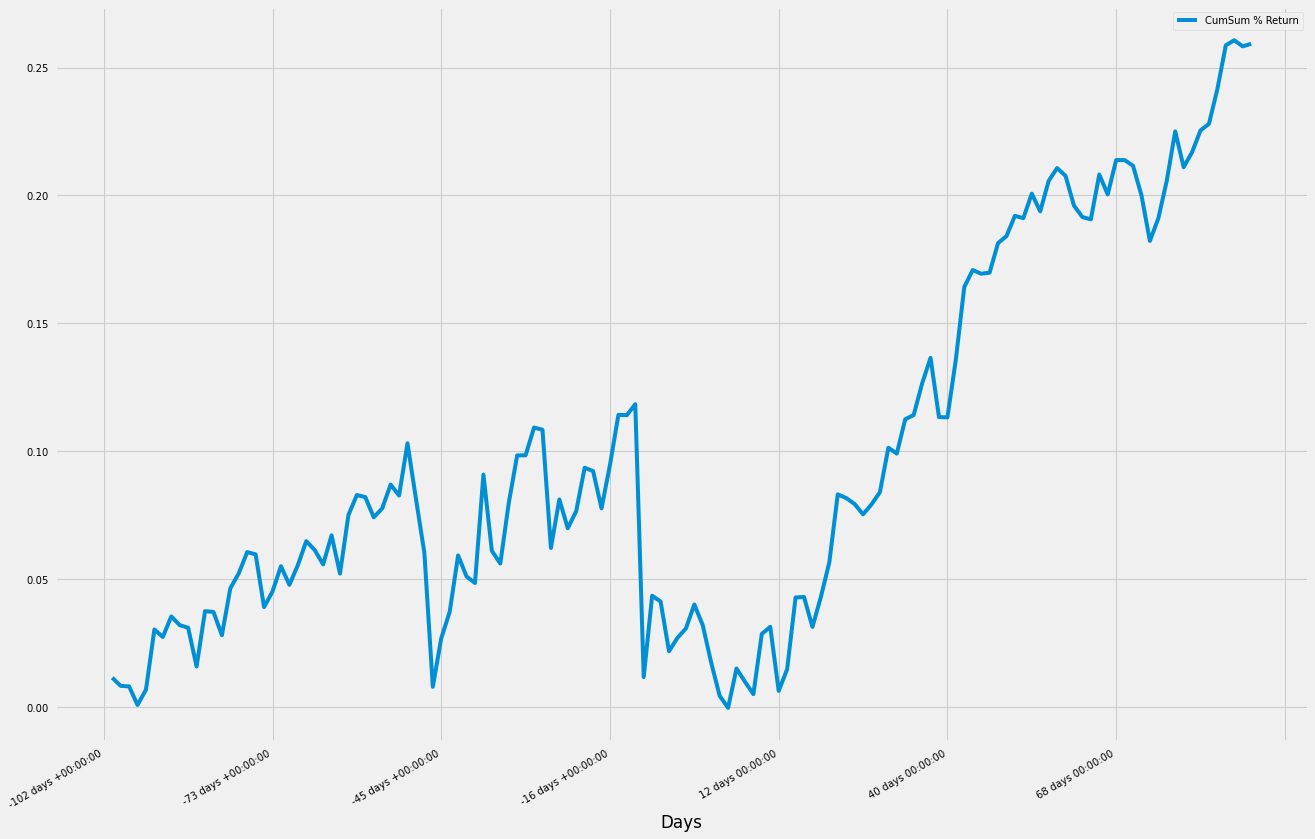

In [954]:
import matplotlib.pyplot as plt
plt.style.use('fivethirtyeight')
plt.figure(figsize=(20,15))
iPhone_11.plot(x='Days', y='CumSum % Return', figsize=(20,15))

In [955]:
#ax1 = iPhone_11.plot.scatter(x='Days',y='CumSum % Return')

iPhone_11['Days'] = iPhone_11['Days'].astype(str)
iPhone_11.head()

<ipython-input-955-c84a6edebf0a>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iPhone_11['Days'] = iPhone_11['Days'].astype(str)


,Date,Adj Close,Close,High,Low,Open,Volume,% Return,Cumulative % Return,Date_2,Days,Period,CumSum % Return
14473,2019-06-10 00:00:00,47.258759,48.145000,48.842499,47.904999,47.952499,104883600.0,NaN,NaN,2019-06-10,-102 days,Pre Release,NaN
14474,2019-06-11 00:00:00,47.805996,48.702499,49.000000,48.400002,48.715000,107731600.0,0.011580,0.011580,2019-06-11,-101 days,Pre Release,0.011580
14475,2019-06-12 00:00:00,47.653847,48.547501,48.992500,48.347500,48.487499,73012800.0,-0.003183,0.008397,2019-06-12,-100 days,Pre Release,0.008397
14476,2019-06-13 00:00:00,47.644032,48.537498,49.197498,48.400002,48.674999,86698400.0,-0.000206,0.008191,2019-06-13,-99 days,Pre Release,0.008191
14477,2019-06-14 00:00:00,47.298027,48.185001,48.397499,47.575001,47.887501,75046000.0,-0.007262,0.000929,2019-06-14,-98 days,Pre Release,0.000929


In [956]:
iPhone_11['Days'] = iPhone_11['Days'].str.replace('days', '')

<ipython-input-956-af8b036353a5>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iPhone_11['Days'] = iPhone_11['Days'].str.replace('days', '')


Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='Days', ylabel='CumSum % Return'>

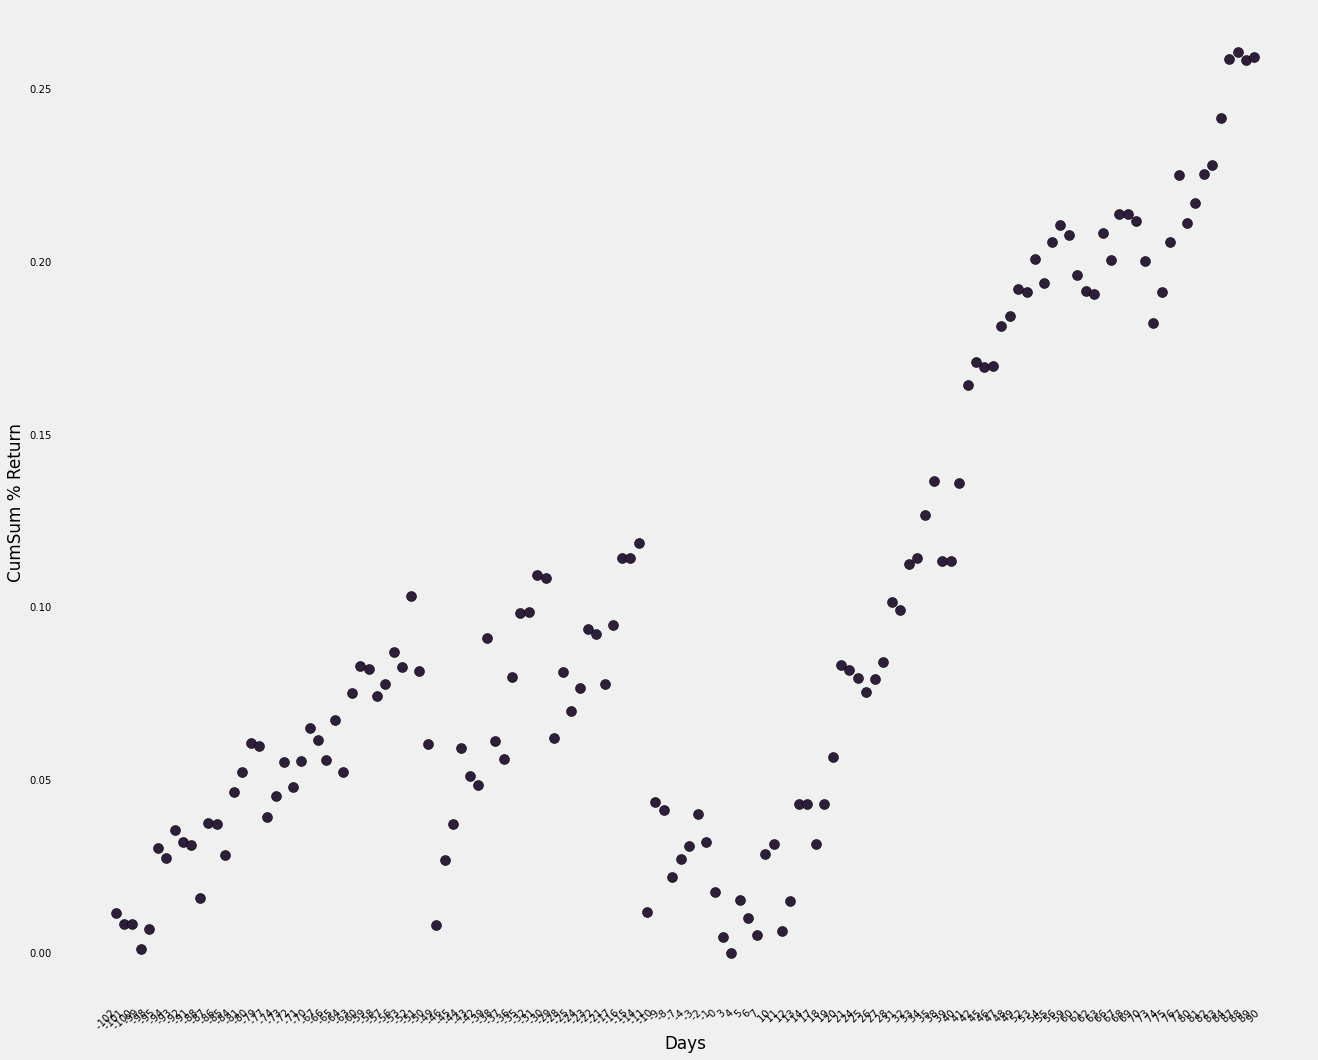

In [957]:
iPhone_11.plot.scatter(x='Days', y='CumSum % Return', figsize=(20,17), grid=False, edgecolor='black', s=100,rot=45)



In [958]:
iPhone_11['CumSum % Return'] = iPhone_11['CumSum % Return']*100

<ipython-input-958-ef532ca0accd>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iPhone_11['CumSum % Return'] = iPhone_11['CumSum % Return']*100


<ipython-input-959-5245536ebf10>:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iPhone_11['Days'] = iPhone_11['Days'].astype('int')


<AxesSubplot:title={'center':'AAPL Price Returns Before and After the iPhone 11 Product Release'}, xlabel='Days before and after the iPhone Release', ylabel='CumSum % Return'>

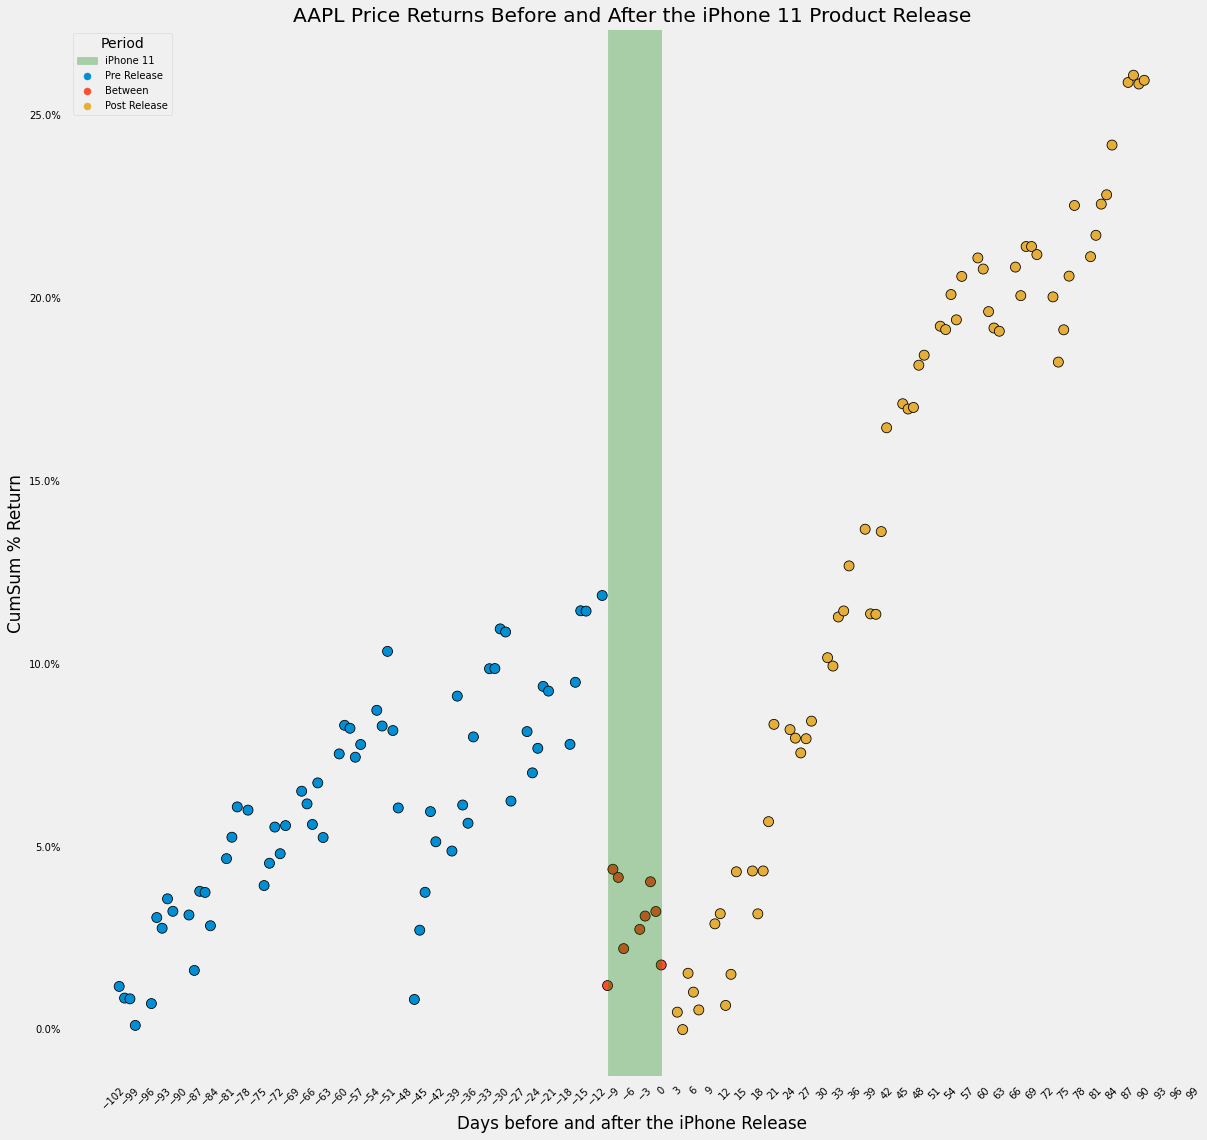

In [959]:
import seaborn as sns
from datetime import datetime
import numpy as np
from matplotlib.ticker import (MultipleLocator,
                               FormatStrFormatter,
                               AutoMinorLocator)
from matplotlib.dates import date2num


iPhone_11['Days'] = iPhone_11['Days'].astype('int')


fig, ax = plt.subplots(figsize=(18,18))

plt.xticks(rotation=45)
plt.xticks(np.arange(-102,150, 3))
plt.xlabel('Days before and after the iPhone Release')
plt.grid(False)
plt.title('AAPL Price Returns Before and After the iPhone 11 Product Release')
ax.axvspan(-10,0, label="iPhone 11", color="green", alpha=0.3)
ax.yaxis.set_major_formatter('{x:1.1f}%')
sns.scatterplot(data=iPhone_11, x='Days', y='CumSum % Return', edgecolor='black',  hue='Period',s=100)






## iPhone X

In [960]:
iPhone_X.head()

,Date,Adj Close,Close,High,Low,Open,Volume
13971,2017-06-12 00:00:00,34.612671,36.355000,36.522499,35.627499,36.435001,289229200.0
13972,2017-06-13 00:00:00,34.891159,36.647499,36.862499,36.287498,36.790001,136661600.0
13973,2017-06-14 00:00:00,34.550785,36.290001,36.875000,35.959999,36.875000,126124800.0
13974,2017-06-15 00:00:00,34.343712,36.072498,36.119999,35.552502,35.830002,128661600.0
13975,2017-06-16 00:00:00,33.862915,35.567501,36.125000,35.549999,35.945000,201444400.0


<ipython-input-961-5475d96c298d>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iPhone_X['% Return'] = iPhone_X['Adj Close'].pct_change()
<ipython-input-961-5475d96c298d>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iPhone_X['Cumulative % Return'] = iPhone_X['% Return'].cumsum()
<ipython-input-961-5475d96c298d>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

<AxesSubplot:title={'center':'AAPL Price Returns Before and After the iPhone X Product Release'}, xlabel='Days before and after the iPhone Release', ylabel='CumSum % Return'>

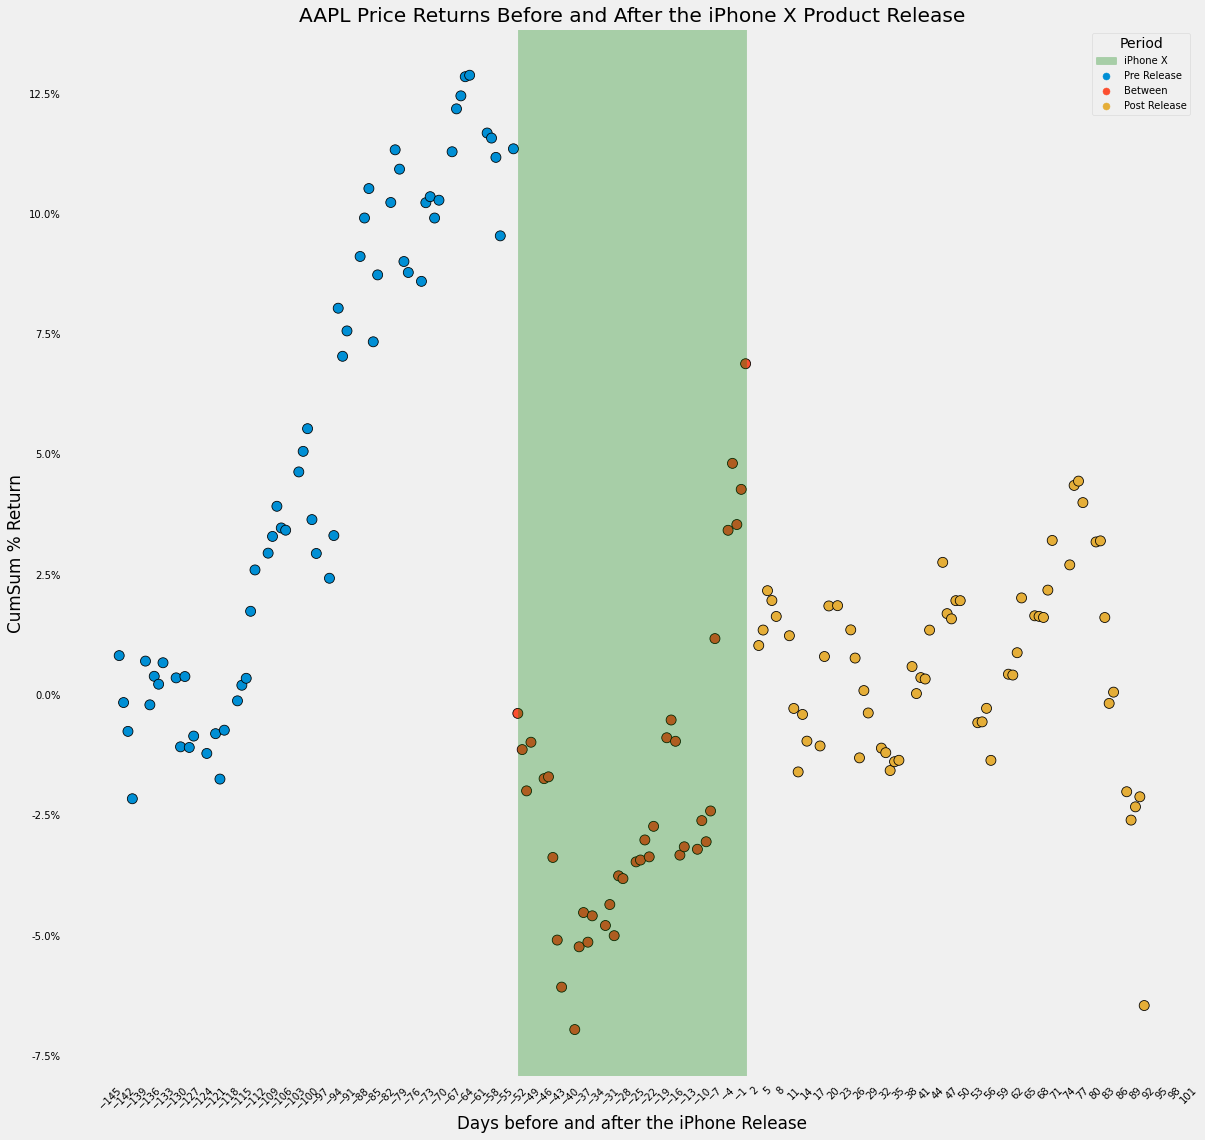

In [961]:
iPhone_X['% Return'] = iPhone_X['Adj Close'].pct_change()
iPhone_X['Cumulative % Return'] = iPhone_X['% Return'].cumsum()
iPhone_X['Date_2'] = iPhone_X['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))


def new(row):
    if row['Date_2'] < pd.to_datetime('11/03/2017'):
        val = row['Date_2'] - pd.to_datetime('11/03/2017')
    else:
        val = row['Date_2'] - pd.to_datetime('11/03/2017')
    return val

def new2(row):
    if row['Date_2'] < pd.to_datetime('09/12/2017'):
        val = 'Pre Release'
    elif row['Date_2']> pd.to_datetime('11/03/2017'):
        val = 'Post Release'
    elif row['Date_2'] >= pd.to_datetime('09/12/2017'):
        val = 'Between'
    else:
        val = row['Date_2']
    return val
    
    
iPhone_X['Days'] = iPhone_X.apply(new,axis=1)
iPhone_X['Period'] = iPhone_X.apply(new2, axis=1)
iPhone_X['CumSum % Return'] = iPhone_X.groupby(['Period'])['% Return'].cumsum(axis=0)
iPhone_X['Days'] = iPhone_X['Days'].astype(str)
iPhone_X['Days'] = iPhone_X['Days'].str.replace('days', '')
iPhone_X['CumSum % Return'] = iPhone_X['CumSum % Return']*100


iPhone_X['Days'] = iPhone_X['Days'].astype('int')


fig, ax = plt.subplots(figsize=(18,18))

plt.xticks(rotation=45)
plt.xticks(np.arange(-145,150, 3))
plt.xlabel('Days before and after the iPhone Release')
plt.grid(False)
plt.title('AAPL Price Returns Before and After the iPhone X Product Release')
ax.axvspan(-52,0, label="iPhone X", color="green", alpha=0.3)
ax.yaxis.set_major_formatter('{x:1.1f}%')
sns.scatterplot(data=iPhone_X, x='Days', y='CumSum % Return', edgecolor='black',  hue='Period',s=100)


## iPhone 6

In [962]:
iPhone_6.head()

,Date,Adj Close,Close,High,Low,Open,Volume
13212,2014-06-09 00:00:00,21.074381,23.424999,23.469999,22.937500,23.174999,301660000.0
13213,2014-06-10 00:00:00,21.198080,23.562500,23.762501,23.392500,23.682501,251108000.0
13214,2014-06-11 00:00:00,21.110369,23.465000,23.690001,23.367500,23.532499,182724000.0
13215,2014-06-12 00:00:00,20.757256,23.072500,23.530001,22.975000,23.510000,218996000.0
13216,2014-06-13 00:00:00,20.530088,22.820000,23.110001,22.719999,23.049999,218100000.0


<ipython-input-963-47a7a6dfc261>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iPhone_6['% Return'] = iPhone_6['Adj Close'].pct_change()
<ipython-input-963-47a7a6dfc261>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iPhone_6['Cumulative % Return'] = iPhone_6['% Return'].cumsum()
<ipython-input-963-47a7a6dfc261>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

<AxesSubplot:title={'center':'AAPL Price Returns Before and After the iPhone 6 Product Release'}, xlabel='Days before and after the iPhone Release', ylabel='CumSum % Return'>

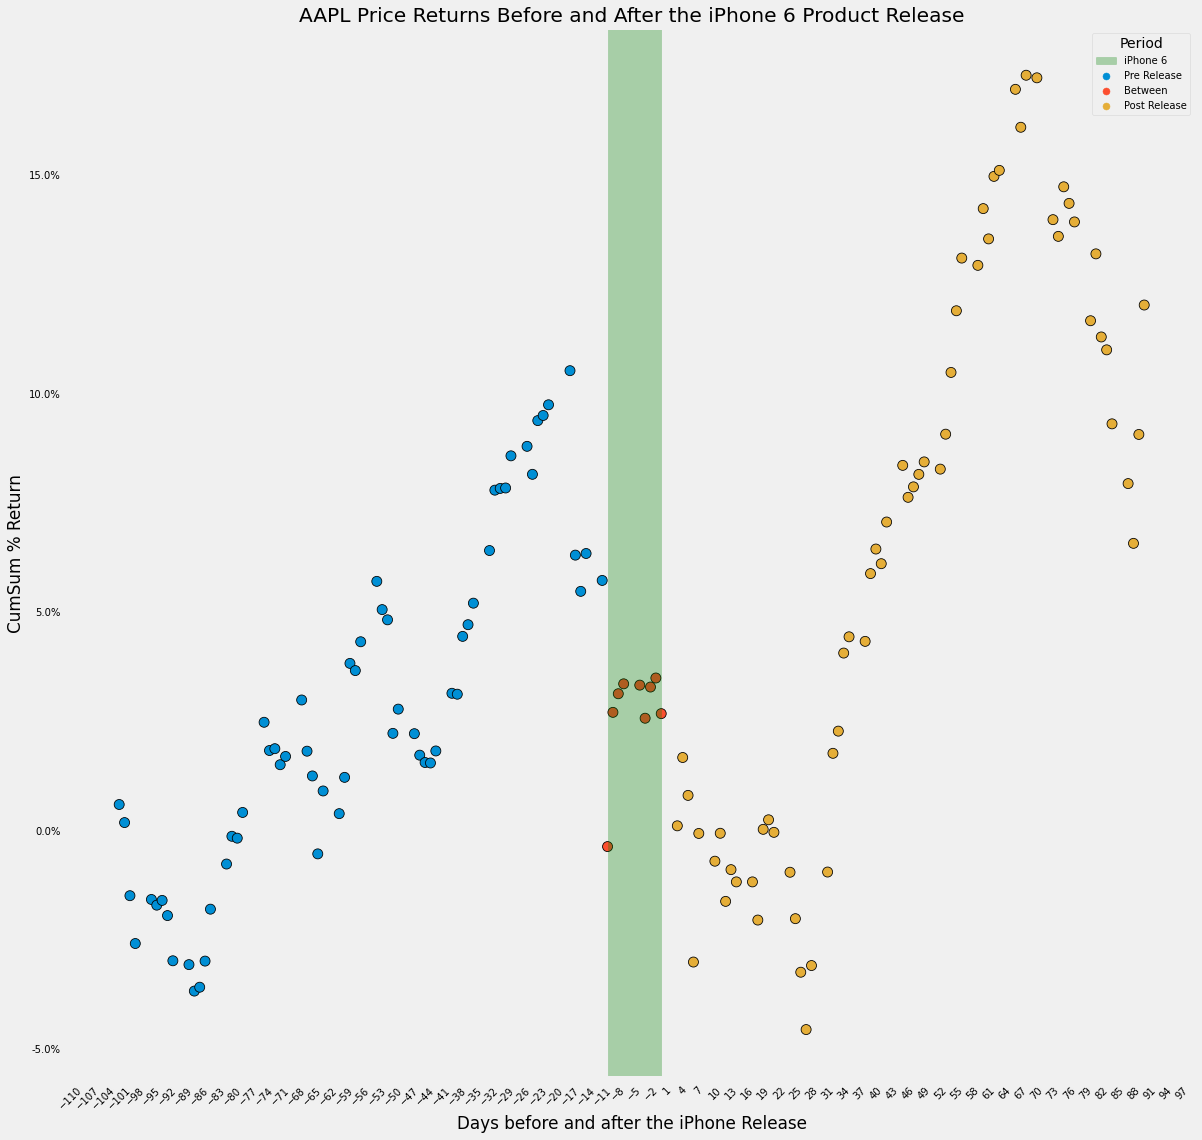

In [963]:
iPhone_6['% Return'] = iPhone_6['Adj Close'].pct_change()
iPhone_6['Cumulative % Return'] = iPhone_6['% Return'].cumsum()
iPhone_6['Date_2'] = iPhone_6['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))


def new(row):
    if row['Date_2'] < pd.to_datetime('09/19/2014'):
        val = row['Date_2'] - pd.to_datetime('09/19/2014')
    else:
        val = row['Date_2'] - pd.to_datetime('09/19/2014')
    return val

def new2(row):
    if row['Date_2'] < pd.to_datetime('09/09/2014'):
        val = 'Pre Release'
    elif row['Date_2']> pd.to_datetime('09/19/2014'):
        val = 'Post Release'
    elif row['Date_2'] >= pd.to_datetime('09/09/2014'):
        val = 'Between'
    else:
        val = row['Date_2']
    return val
    
    
iPhone_6['Days'] = iPhone_6.apply(new,axis=1)
iPhone_6['Period'] = iPhone_6.apply(new2, axis=1)
iPhone_6['CumSum % Return'] = iPhone_6.groupby(['Period'])['% Return'].cumsum(axis=0)
iPhone_6['Days'] = iPhone_6['Days'].astype(str)
iPhone_6['Days'] = iPhone_6['Days'].str.replace('days', '')
iPhone_6['CumSum % Return'] = iPhone_6['CumSum % Return']*100


iPhone_6['Days'] = iPhone_6['Days'].astype('int')


fig, ax = plt.subplots(figsize=(18,18))

plt.xticks(rotation=45)
plt.xticks(np.arange(-110,110, 3))
plt.xlabel('Days before and after the iPhone Release')
plt.grid(False)
plt.title('AAPL Price Returns Before and After the iPhone 6 Product Release')
ax.axvspan(-10,0, label="iPhone 6", color="green", alpha=0.3)
ax.yaxis.set_major_formatter('{x:1.1f}%')
sns.scatterplot(data=iPhone_6, x='Days', y='CumSum % Return', edgecolor='black',  hue='Period',s=100)

## iPhone 7

<ipython-input-964-21a624a41c95>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iPhone_7['% Return'] = iPhone_7['Adj Close'].pct_change()
<ipython-input-964-21a624a41c95>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iPhone_7['Cumulative % Return'] = iPhone_7['% Return'].cumsum()
<ipython-input-964-21a624a41c95>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

<AxesSubplot:title={'center':'AAPL Price Returns Before and After the iPhone 7 Product Release'}, xlabel='Days before and after the iPhone Release', ylabel='CumSum % Return'>

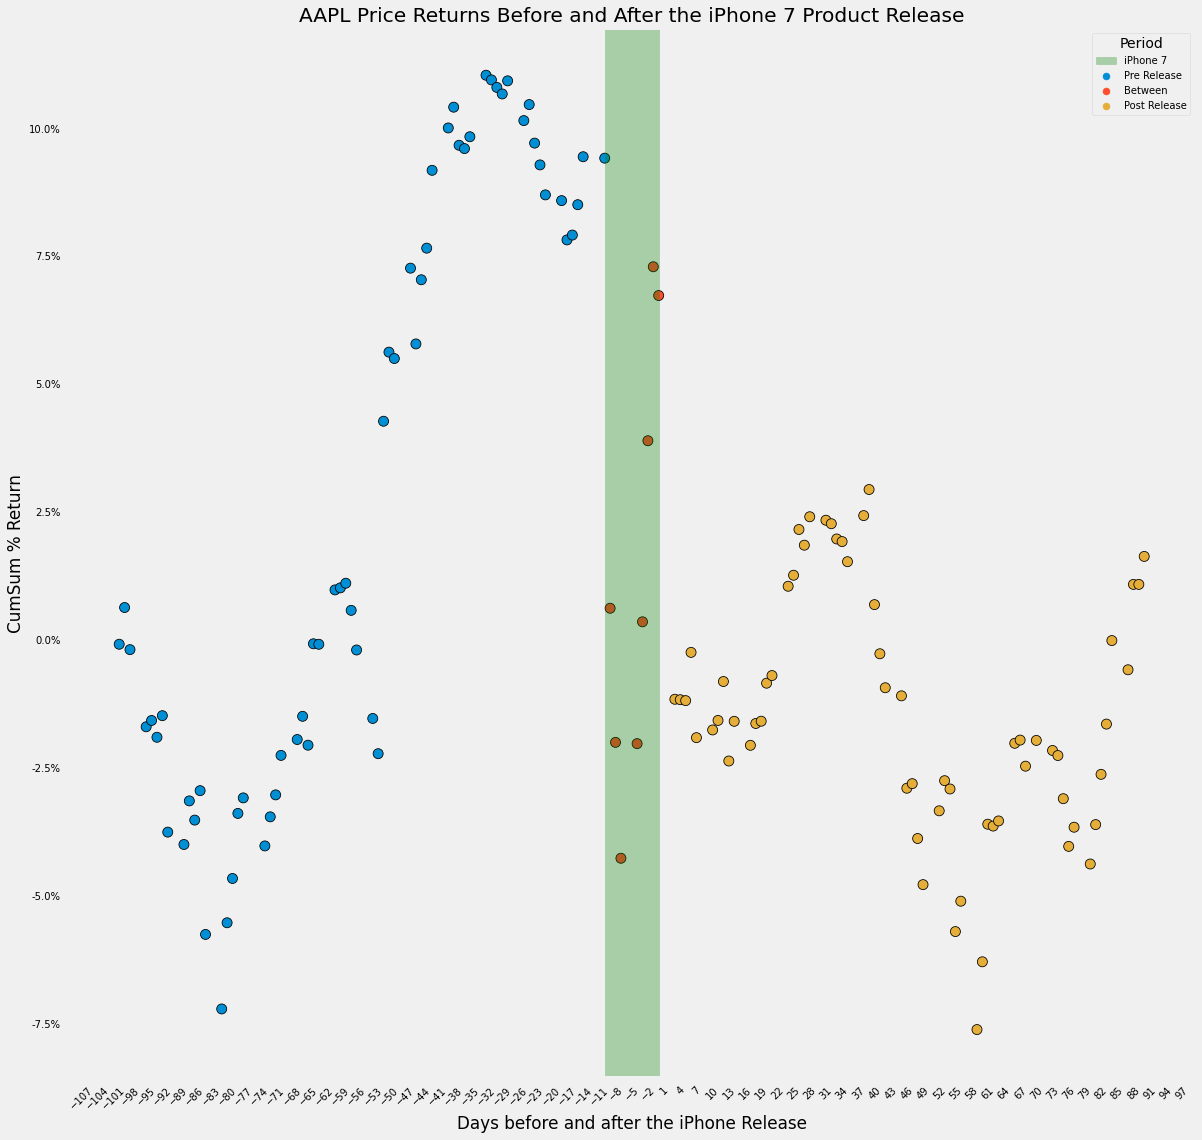

In [964]:
iPhone_7['% Return'] = iPhone_7['Adj Close'].pct_change()
iPhone_7['Cumulative % Return'] = iPhone_7['% Return'].cumsum()
iPhone_7['Date_2'] = iPhone_7['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))


def new(row):
    if row['Date_2'] < pd.to_datetime('09/16/2016'):
        val = row['Date_2'] - pd.to_datetime('09/16/2016')
    else:
        val = row['Date_2'] - pd.to_datetime('09/16/2016')
    return val

def new2(row):
    if row['Date_2'] < pd.to_datetime('09/07/2016'):
        val = 'Pre Release'
    elif row['Date_2']> pd.to_datetime('09/16/2016'):
        val = 'Post Release'
    elif row['Date_2'] >= pd.to_datetime('09/07/2016'):
        val = 'Between'
    else:
        val = row['Date_2']
    return val
    
    
iPhone_7['Days'] = iPhone_7.apply(new,axis=1)
iPhone_7['Period'] = iPhone_7.apply(new2, axis=1)
iPhone_7['CumSum % Return'] = iPhone_7.groupby(['Period'])['% Return'].cumsum(axis=0)
iPhone_7['Days'] = iPhone_7['Days'].astype(str)
iPhone_7['Days'] = iPhone_7['Days'].str.replace('days', '')
iPhone_7['CumSum % Return'] = iPhone_7['CumSum % Return']*100


iPhone_7['Days'] = iPhone_7['Days'].astype('int')


fig, ax = plt.subplots(figsize=(18,18))

plt.xticks(rotation=45)
plt.xticks(np.arange(-110,110, 3))
plt.xlabel('Days before and after the iPhone Release')
plt.grid(False)
plt.title('AAPL Price Returns Before and After the iPhone 7 Product Release')
ax.axvspan(-10,0, label="iPhone 7", color="green", alpha=0.3)
ax.yaxis.set_major_formatter('{x:1.1f}%')
sns.scatterplot(data=iPhone_7, x='Days', y='CumSum % Return', edgecolor='black',  hue='Period',s=100)

## iPhone 8

<ipython-input-965-e104896ee1c2>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iPhone_8['% Return'] = iPhone_8['Adj Close'].pct_change()
<ipython-input-965-e104896ee1c2>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iPhone_8['Cumulative % Return'] = iPhone_8['% Return'].cumsum()
<ipython-input-965-e104896ee1c2>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: htt

<AxesSubplot:title={'center':'AAPL Price Returns Before and After the iPhone 8 Product Release'}, xlabel='Days before and after the iPhone Release', ylabel='CumSum % Return'>

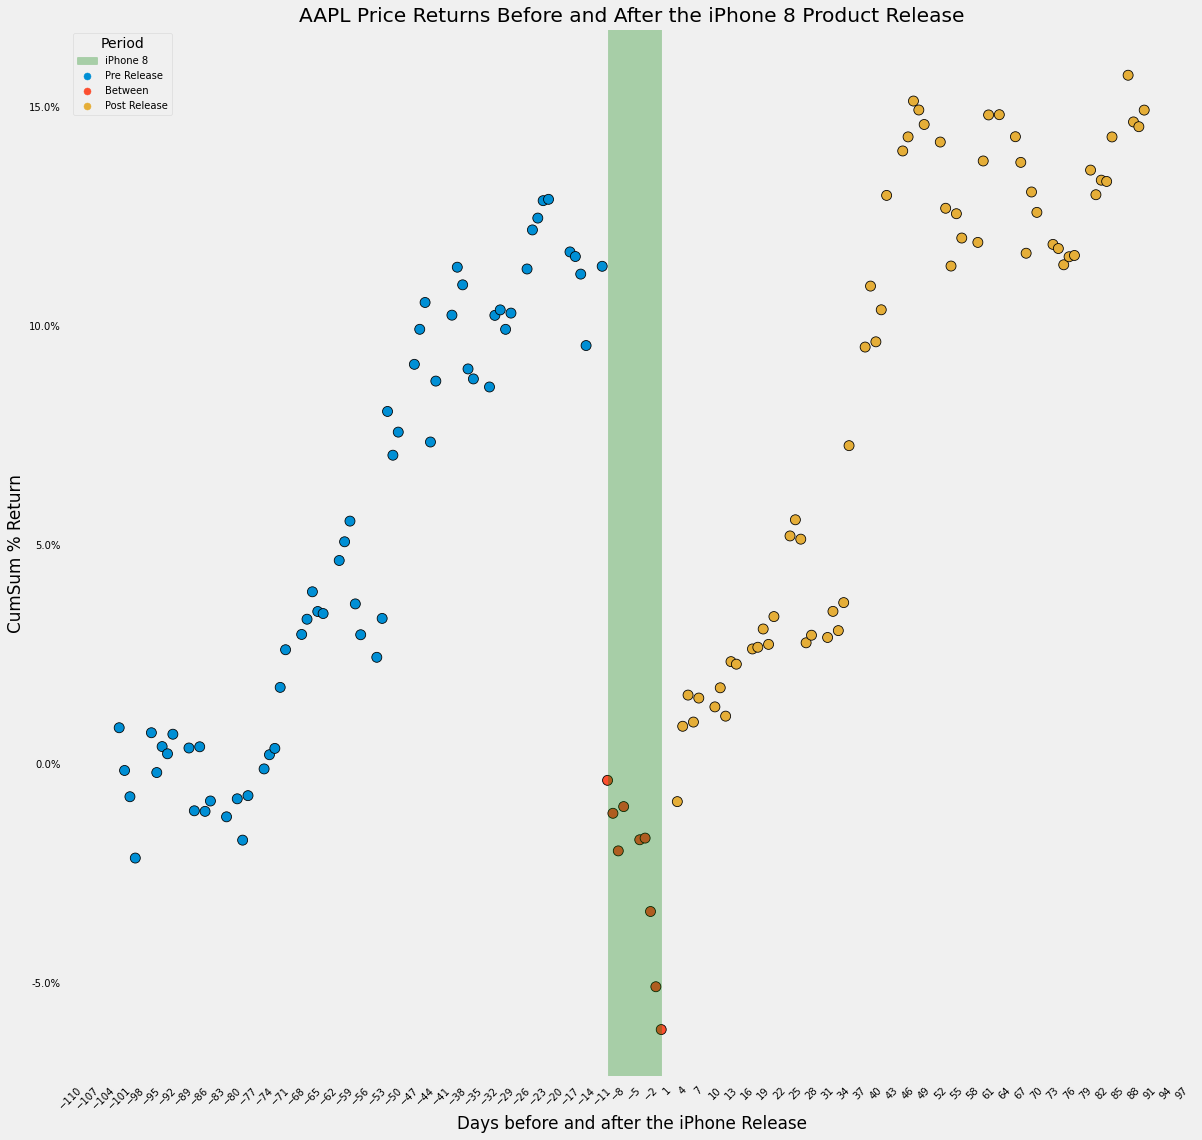

In [965]:
# 2017-09-12	2017-09-22

iPhone_8['% Return'] = iPhone_8['Adj Close'].pct_change()
iPhone_8['Cumulative % Return'] = iPhone_8['% Return'].cumsum()
iPhone_8['Date_2'] = iPhone_8['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))


def new(row):
    if row['Date_2'] < pd.to_datetime('09/22/2017'):
        val = row['Date_2'] - pd.to_datetime('09/22/2017')
    else:
        val = row['Date_2'] - pd.to_datetime('09/22/2017')
    return val

def new2(row):
    if row['Date_2'] < pd.to_datetime('09/12/2017'):
        val = 'Pre Release'
    elif row['Date_2']> pd.to_datetime('09/22/2017'):
        val = 'Post Release'
    elif row['Date_2'] >= pd.to_datetime('09/12/2017'):
        val = 'Between'
    else:
        val = row['Date_2']
    return val
    
    
iPhone_8['Days'] = iPhone_8.apply(new,axis=1)
iPhone_8['Period'] = iPhone_8.apply(new2, axis=1)
iPhone_8['CumSum % Return'] = iPhone_8.groupby(['Period'])['% Return'].cumsum(axis=0)
iPhone_8['Days'] = iPhone_8['Days'].astype(str)
iPhone_8['Days'] = iPhone_8['Days'].str.replace('days', '')
iPhone_8['CumSum % Return'] = iPhone_8['CumSum % Return']*100


iPhone_8['Days'] = iPhone_8['Days'].astype('int')


fig, ax = plt.subplots(figsize=(18,18))

plt.xticks(rotation=45)
plt.xticks(np.arange(-110,110, 3))
plt.xlabel('Days before and after the iPhone Release')
plt.grid(False)
plt.title('AAPL Price Returns Before and After the iPhone 8 Product Release')
ax.axvspan(-10,0, label="iPhone 8", color="green", alpha=0.3)
ax.yaxis.set_major_formatter('{x:1.1f}%')
sns.scatterplot(data=iPhone_8, x='Days', y='CumSum % Return', edgecolor='black',  hue='Period',s=100)

## iPhone 11

<ipython-input-966-5999649f1164>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iPhone_11['% Return'] = iPhone_11['Adj Close'].pct_change()
<ipython-input-966-5999649f1164>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iPhone_11['Cumulative % Return'] = iPhone_11['% Return'].cumsum()
<ipython-input-966-5999649f1164>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

<AxesSubplot:title={'center':'AAPL Price Returns Before and After the iPhone 11 Product Release'}, xlabel='Days before and after the iPhone Release', ylabel='CumSum % Return'>

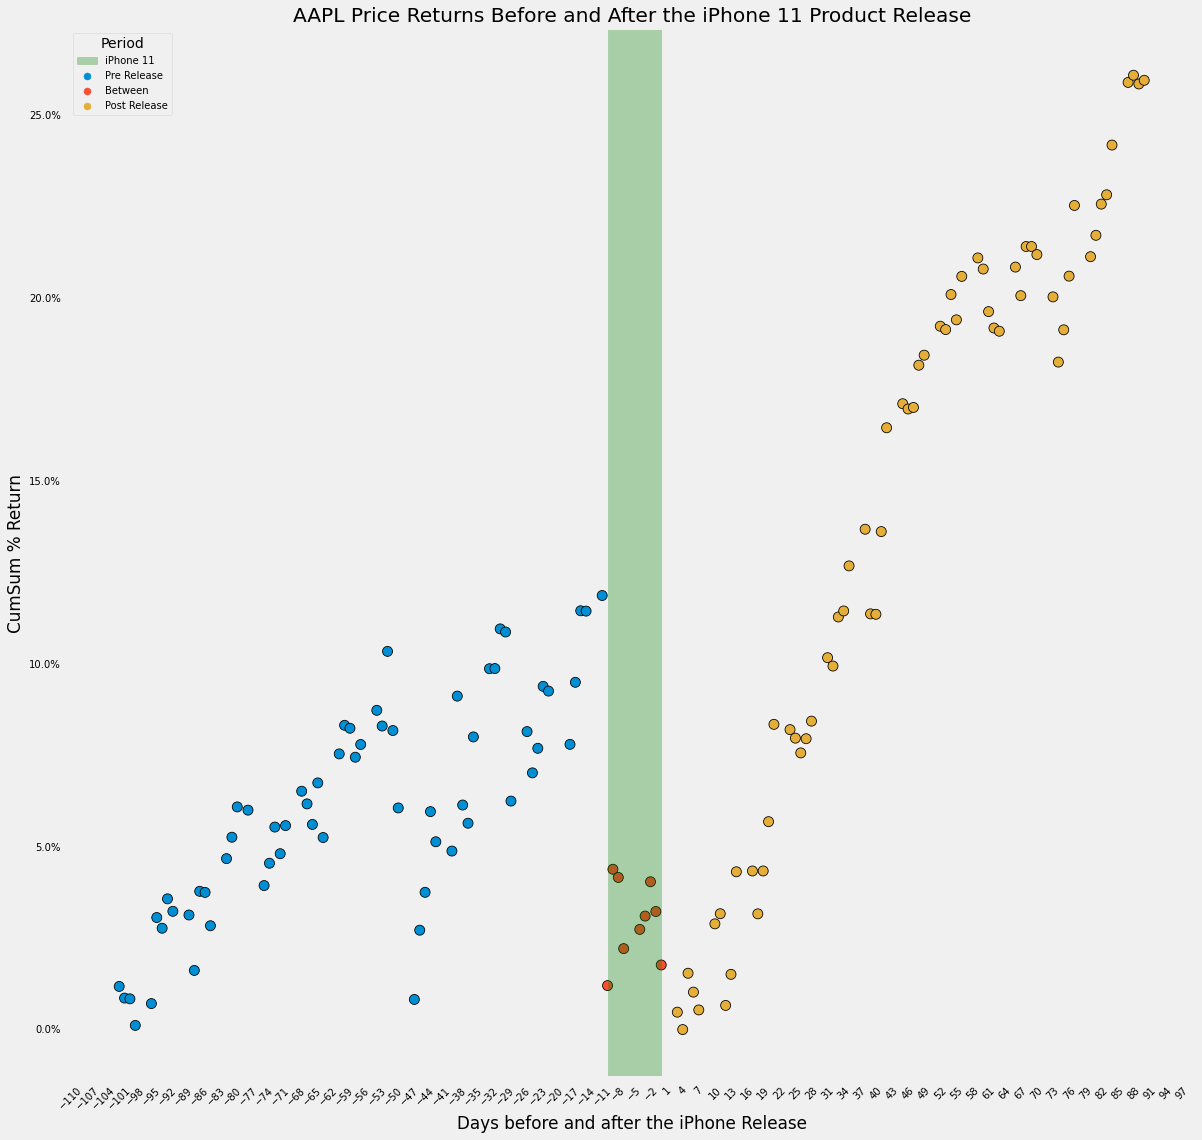

In [966]:
# 2019-09-10	2019-09-20

iPhone_11['% Return'] = iPhone_11['Adj Close'].pct_change()
iPhone_11['Cumulative % Return'] = iPhone_11['% Return'].cumsum()
iPhone_11['Date_2'] = iPhone_11['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))


def new(row):
    if row['Date_2'] < pd.to_datetime('09/20/2019'):
        val = row['Date_2'] - pd.to_datetime('09/20/2019')
    else:
        val = row['Date_2'] - pd.to_datetime('09/20/2019')
    return val

def new2(row):
    if row['Date_2'] < pd.to_datetime('09/10/2019'):
        val = 'Pre Release'
    elif row['Date_2']> pd.to_datetime('09/20/2019'):
        val = 'Post Release'
    elif row['Date_2'] >= pd.to_datetime('09/10/2019'):
        val = 'Between'
    else:
        val = row['Date_2']
    return val
    
    
iPhone_11['Days'] = iPhone_11.apply(new,axis=1)
iPhone_11['Period'] = iPhone_11.apply(new2, axis=1)
iPhone_11['CumSum % Return'] = iPhone_11.groupby(['Period'])['% Return'].cumsum(axis=0)
iPhone_11['Days'] = iPhone_11['Days'].astype(str)
iPhone_11['Days'] = iPhone_11['Days'].str.replace('days', '')
iPhone_11['CumSum % Return'] = iPhone_11['CumSum % Return']*100


iPhone_11['Days'] = iPhone_11['Days'].astype('int')


fig, ax = plt.subplots(figsize=(18,18))

plt.xticks(rotation=45)
plt.xticks(np.arange(-110,110, 3))
plt.xlabel('Days before and after the iPhone Release')
plt.grid(False)
plt.title('AAPL Price Returns Before and After the iPhone 11 Product Release')
ax.axvspan(-10,0, label="iPhone 11", color="green", alpha=0.3)
ax.yaxis.set_major_formatter('{x:1.1f}%')
sns.scatterplot(data=iPhone_11, x='Days', y='CumSum % Return', edgecolor='black',  hue='Period',s=100)

## iPhone 12

<ipython-input-967-2680783dcb28>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iPhone_12['% Return'] = iPhone_12['Adj Close'].pct_change()
<ipython-input-967-2680783dcb28>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iPhone_12['Cumulative % Return'] = iPhone_12['% Return'].cumsum()
<ipython-input-967-2680783dcb28>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

<AxesSubplot:title={'center':'AAPL Price Returns Before and After the iPhone 12 Product Release'}, xlabel='Days before and after the iPhone Release', ylabel='CumSum % Return'>

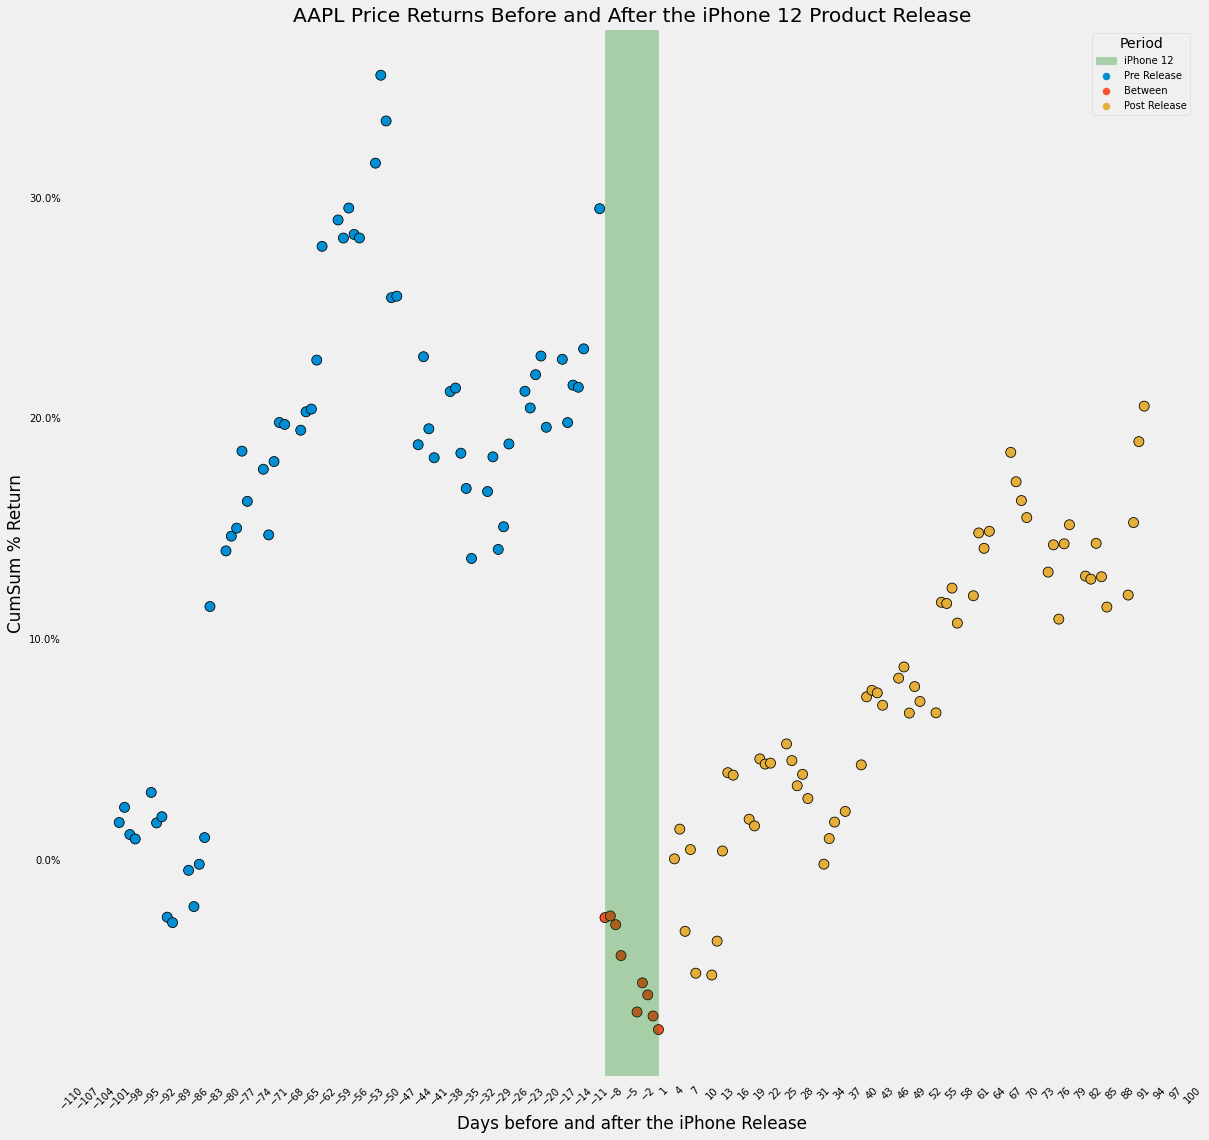

In [967]:
# 2020-10-13	2020-10-23

iPhone_12['% Return'] = iPhone_12['Adj Close'].pct_change()
iPhone_12['Cumulative % Return'] = iPhone_12['% Return'].cumsum()
iPhone_12['Date_2'] = iPhone_12['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))


def new(row):
    if row['Date_2'] < pd.to_datetime('10/23/2020'):
        val = row['Date_2'] - pd.to_datetime('10/23/2020')
    else:
        val = row['Date_2'] - pd.to_datetime('10/23/2020')
    return val

def new2(row):
    if row['Date_2'] < pd.to_datetime('10/13/2020'):
        val = 'Pre Release'
    elif row['Date_2']> pd.to_datetime('10/23/2020'):
        val = 'Post Release'
    elif row['Date_2'] >= pd.to_datetime('10/13/2020'):
        val = 'Between'
    else:
        val = row['Date_2']
    return val
    
    
iPhone_12['Days'] = iPhone_12.apply(new,axis=1)
iPhone_12['Period'] = iPhone_12.apply(new2, axis=1)
iPhone_12['CumSum % Return'] = iPhone_12.groupby(['Period'])['% Return'].cumsum(axis=0)
iPhone_12['Days'] = iPhone_12['Days'].astype(str)
iPhone_12['Days'] = iPhone_12['Days'].str.replace('days', '')
iPhone_12['CumSum % Return'] = iPhone_12['CumSum % Return']*100


iPhone_12['Days'] = iPhone_12['Days'].astype('int')


fig, ax = plt.subplots(figsize=(18,18))

plt.xticks(rotation=45)
plt.xticks(np.arange(-110,110, 3))
plt.xlabel('Days before and after the iPhone Release')
plt.grid(False)
plt.title('AAPL Price Returns Before and After the iPhone 12 Product Release')
ax.axvspan(-10,0, label="iPhone 12", color="green", alpha=0.3)
ax.yaxis.set_major_formatter('{x:1.1f}%')
sns.scatterplot(data=iPhone_12, x='Days', y='CumSum % Return', edgecolor='black',  hue='Period',s=100)

## iPhone 13

<ipython-input-968-cbc4dcb3daad>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iPhone_13['% Return'] = iPhone_13['Adj Close'].pct_change()
<ipython-input-968-cbc4dcb3daad>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iPhone_13['Cumulative % Return'] = iPhone_13['% Return'].cumsum()
<ipython-input-968-cbc4dcb3daad>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation:

<AxesSubplot:title={'center':'AAPL Price Returns Before and After the iPhone 13 Product Release'}, xlabel='Days before and after the iPhone Release', ylabel='CumSum % Return'>

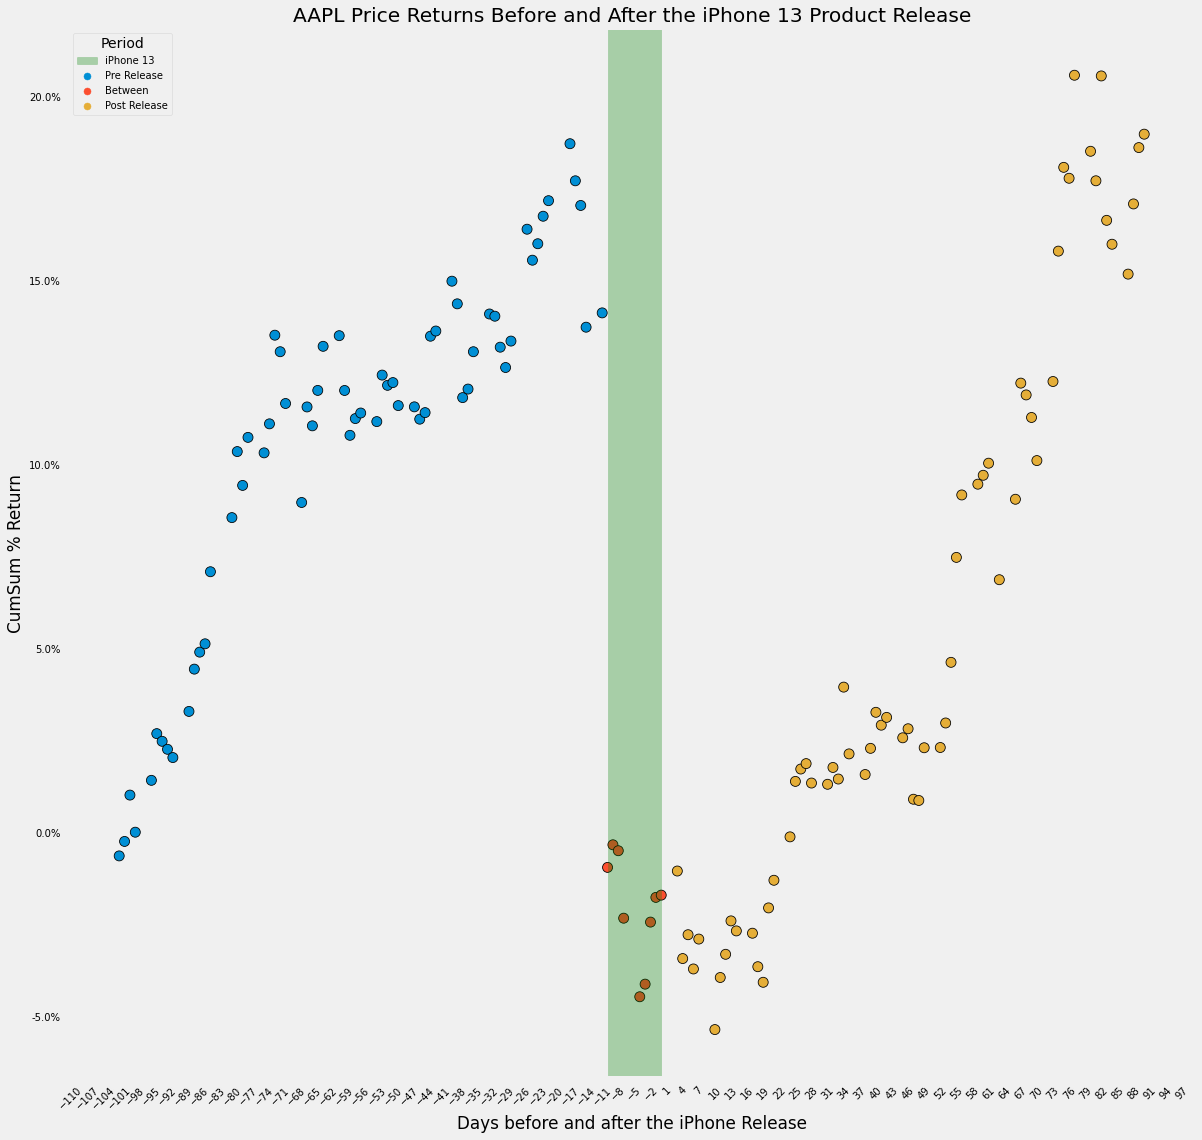

In [968]:
# 2021-09-14	2021-09-24	

iPhone_13['% Return'] = iPhone_13['Adj Close'].pct_change()
iPhone_13['Cumulative % Return'] = iPhone_13['% Return'].cumsum()
iPhone_13['Date_2'] = iPhone_13['Date'].apply(lambda x: 
                                    dt.datetime.strptime(x,'%Y-%m-%d %H:%M:%S'))


def new(row):
    if row['Date_2'] < pd.to_datetime('09/22/2021'):
        val = row['Date_2'] - pd.to_datetime('09/24/2021')
    else:
        val = row['Date_2'] - pd.to_datetime('09/24/2021')
    return val

def new2(row):
    if row['Date_2'] < pd.to_datetime('09/14/2021'):
        val = 'Pre Release'
    elif row['Date_2']> pd.to_datetime('09/24/2021'):
        val = 'Post Release'
    elif row['Date_2'] >= pd.to_datetime('09/11/2021'):
        val = 'Between'
    else:
        val = row['Date_2']
    return val
    
    
iPhone_13['Days'] = iPhone_13.apply(new,axis=1)
iPhone_13['Period'] = iPhone_13.apply(new2, axis=1)
iPhone_13['CumSum % Return'] = iPhone_13.groupby(['Period'])['% Return'].cumsum(axis=0)
iPhone_13['Days'] = iPhone_13['Days'].astype(str)
iPhone_13['Days'] = iPhone_13['Days'].str.replace('days', '')
iPhone_13['CumSum % Return'] = iPhone_13['CumSum % Return']*100


iPhone_13['Days'] = iPhone_13['Days'].astype('int')


fig, ax = plt.subplots(figsize=(18,18))

plt.xticks(rotation=45)
plt.xticks(np.arange(-110,110, 3))
plt.xlabel('Days before and after the iPhone Release')
plt.grid(False)
plt.title('AAPL Price Returns Before and After the iPhone 13 Product Release')
ax.axvspan(-10,0, label="iPhone 13", color="green", alpha=0.3)
ax.yaxis.set_major_formatter('{x:1.1f}%')
sns.scatterplot(data=iPhone_13, x='Days', y='CumSum % Return', edgecolor='black',  hue='Period',s=100)

In [969]:
# concat dataframes
df_list = [iPhone_6, iPhone_7, iPhone_8, iPhone_X, iPhone_11, iPhone_12, iPhone_13]
iPhone_6['iPhone'] = 'iPhone_6'
iPhone_7['iPhone'] = 'iPhone_7'
iPhone_8['iPhone'] = 'iPhone_8'
iPhone_X['iPhone'] = 'iPhone_X'
iPhone_11['iPhone'] = 'iPhone_11'
iPhone_12['iPhone'] = 'iPhone_12'
iPhone_13['iPhone'] = 'iPhone_13'


iphone_master = pd.concat(df_list)
iphone_master.head()

<ipython-input-969-d8c9a032dd6e>:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iPhone_6['iPhone'] = 'iPhone_6'
<ipython-input-969-d8c9a032dd6e>:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iPhone_7['iPhone'] = 'iPhone_7'
<ipython-input-969-d8c9a032dd6e>:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/index

,Date,Adj Close,Close,High,Low,Open,Volume,% Return,Cumulative % Return,Date_2,Days,Period,CumSum % Return,iPhone
13212,2014-06-09 00:00:00,21.074381,23.424999,23.469999,22.937500,23.174999,301660000.0,NaN,NaN,2014-06-09,-102,Pre Release,NaN,iPhone_6
13213,2014-06-10 00:00:00,21.198080,23.562500,23.762501,23.392500,23.682501,251108000.0,0.005870,0.005870,2014-06-10,-101,Pre Release,0.586965,iPhone_6
13214,2014-06-11 00:00:00,21.110369,23.465000,23.690001,23.367500,23.532499,182724000.0,-0.004138,0.001732,2014-06-11,-100,Pre Release,0.173195,iPhone_6
13215,2014-06-12 00:00:00,20.757256,23.072500,23.530001,22.975000,23.510000,218996000.0,-0.016727,-0.014995,2014-06-12,-99,Pre Release,-1.499506,iPhone_6
13216,2014-06-13 00:00:00,20.530088,22.820000,23.110001,22.719999,23.049999,218100000.0,-0.010944,-0.025939,2014-06-13,-98,Pre Release,-2.593904,iPhone_6


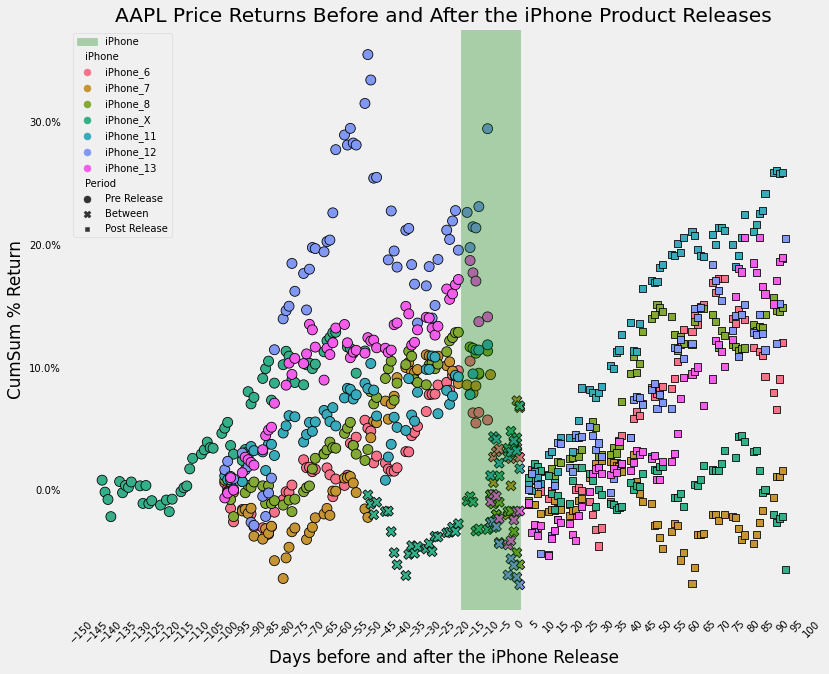

In [970]:

fig, ax = plt.subplots(figsize=(12,10))

plt.xticks(rotation=45)
plt.xticks(np.arange(-150,110, 5))
plt.xlabel('Days before and after the iPhone Release')
plt.grid(False)
plt.title('AAPL Price Returns Before and After the iPhone Product Releases')
ax.axvspan(-20,0, label="iPhone", color="green", alpha=0.3)
ax.yaxis.set_major_formatter('{x:1.1f}%')
sns.scatterplot(data=iphone_master, x='Days', y='CumSum % Return', edgecolor='black',  hue='iPhone',style='Period',s=100)
plt.savefig('iphones_all.png')




In [971]:
iphone_avg = iphone_master.groupby('Days',as_index=False)['CumSum % Return'].mean()
iphone_avg.head()

,Days,CumSum % Return
0,-144,NaN
1,-143,0.804584
2,-142,-0.170946
3,-141,-0.770276
4,-140,-2.170232


<AxesSubplot:title={'center':'AAPL Price Returns Before and After the iPhone Product Releases'}, xlabel='Days before and after the iPhone Release', ylabel='CumSum % Return'>

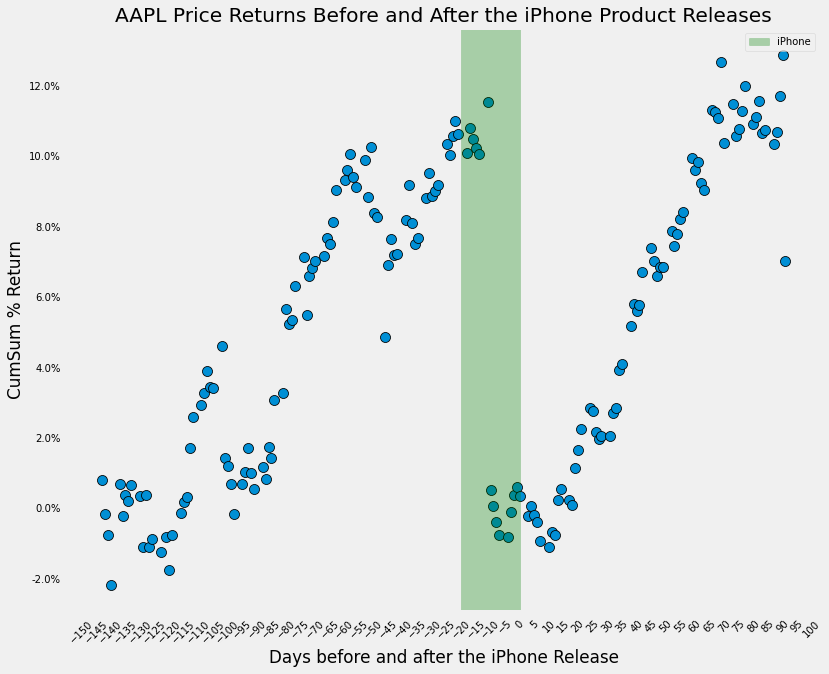

In [972]:
fig, ax = plt.subplots(figsize=(12,10))

plt.xticks(rotation=45)
plt.xticks(np.arange(-150,110, 5))
plt.xlabel('Days before and after the iPhone Release')
plt.grid(False)
plt.title('AAPL Price Returns Before and After the iPhone Product Releases')
ax.axvspan(-20,0, label="iPhone", color="green", alpha=0.3)
ax.yaxis.set_major_formatter('{x:1.1f}%')
sns.scatterplot(data=iphone_avg, x='Days', y='CumSum % Return', edgecolor='black',s=100)





## SP 500 Data

In [973]:
iphone_master[iphone_master['iPhone']=='iPhone_6'].head(2)

,Date,Adj Close,Close,High,Low,Open,Volume,% Return,Cumulative % Return,Date_2,Days,Period,CumSum % Return,iPhone
13212,2014-06-09 00:00:00,21.074381,23.424999,23.469999,22.9375,23.174999,301660000.0,NaN,NaN,2014-06-09,-102,Pre Release,NaN,iPhone_6
13213,2014-06-10 00:00:00,21.198080,23.562500,23.762501,23.3925,23.682501,251108000.0,0.00587,0.00587,2014-06-10,-101,Pre Release,0.586965,iPhone_6


In [974]:
sp500_df = pd.read_csv('SP500.csv')
#sp500_df['SP500'] = sp500_df['SP500'].astype('float')
sp500_df['SP500'] = pd.to_numeric(sp500_df['SP500'],errors = 'coerce')
sp500_df['% 1-Day Return'] = sp500_df['SP500'].pct_change()*100
sp500_df.tail()

,DATE,SP500,% 1-Day Return
2021,2022-03-07,4201.09,-2.951810
2022,2022-03-08,4170.70,-0.723384
2023,2022-03-09,4277.88,2.569832
2024,2022-03-10,4259.52,-0.429185
2025,2022-03-11,4204.31,-1.296155


In [975]:
AAPL_price_subset['Volume Chg'] = AAPL_price_subset['Volume'].pct_change()*100

<ipython-input-975-cad4e0534417>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAPL_price_subset['Volume Chg'] = AAPL_price_subset['Volume'].pct_change()*100


In [976]:
AAPL_price_subset.head()

,Date,Adj Close,Close,High,Low,Open,Volume,Volume Chg
11214,2006-07-03 00:00:00,1.779692,2.069643,2.077857,2.047857,2.054286,194770800.0,NaN
11215,2006-07-05 00:00:00,1.750517,2.035714,2.057143,2.020000,2.041071,518240800.0,166.077256
11216,2006-07-06 00:00:00,1.712743,1.991786,2.050000,1.986071,2.038929,633208800.0,22.184282
11217,2006-07-07 00:00:00,1.701380,1.978571,2.019643,1.952500,1.981429,799360800.0,26.239686
11218,2006-07-10 00:00:00,1.689096,1.964286,2.017500,1.946429,1.989286,529345600.0,-33.778889


<AxesSubplot:xlabel='Date'>

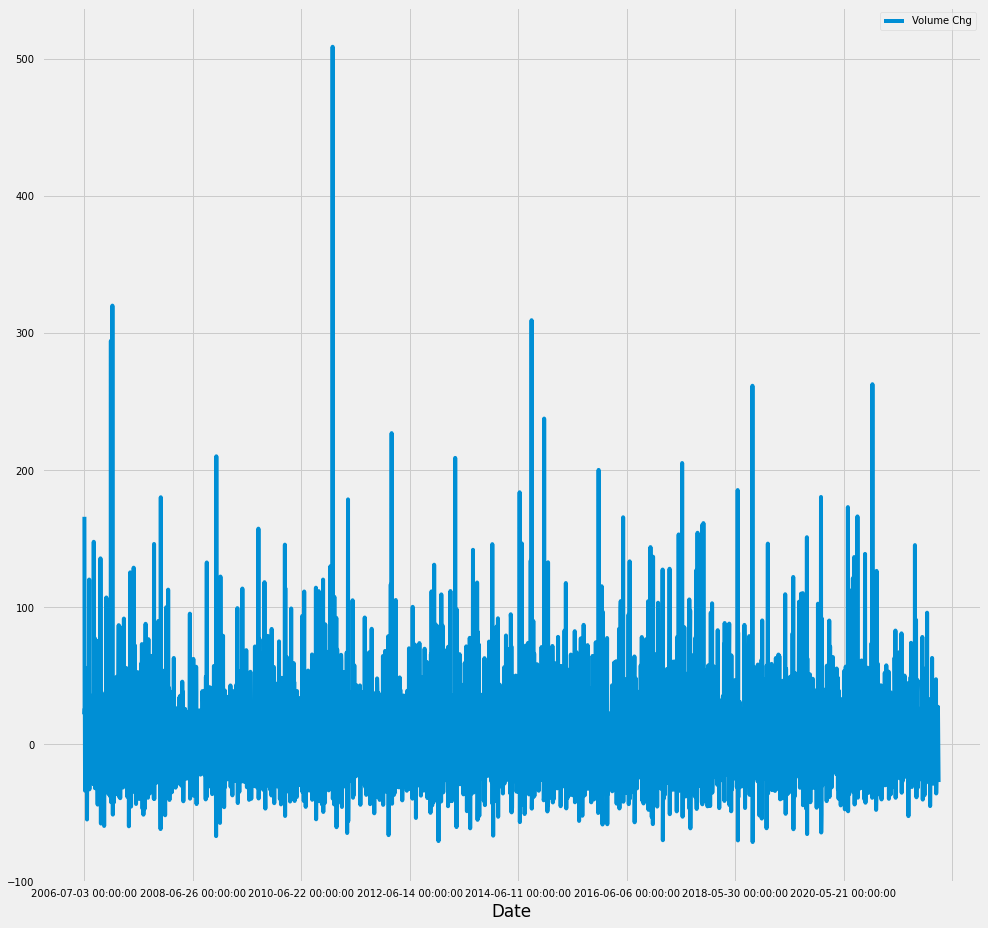

In [977]:
AAPL_price_subset.plot(x='Date', y='Volume Chg', figsize=(15,15))

In [978]:
# perform a join on the AAPl and SP500 data
sp500_df.head(2)

,DATE,SP500,% 1-Day Return
0,2014-06-06,1949.44,NaN
1,2014-06-09,1951.27,0.093873


In [979]:
sp500_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2026 entries, 0 to 2025
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   DATE            2026 non-null   object 
 1   SP500           1956 non-null   float64
 2   % 1-Day Return  2025 non-null   float64
dtypes: float64(2), object(1)
memory usage: 47.6+ KB


In [980]:
AAPL_price_subset['Date'] = pd.to_datetime(AAPL_price_subset['Date'], format = '%Y-%m-%d %H:%M:%S')
AAPL_price_subset.head()

<ipython-input-980-463b847c7ee3>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  AAPL_price_subset['Date'] = pd.to_datetime(AAPL_price_subset['Date'], format = '%Y-%m-%d %H:%M:%S')


,Date,Adj Close,Close,High,Low,Open,Volume,Volume Chg
11214,2006-07-03,1.779692,2.069643,2.077857,2.047857,2.054286,194770800.0,NaN
11215,2006-07-05,1.750517,2.035714,2.057143,2.020000,2.041071,518240800.0,166.077256
11216,2006-07-06,1.712743,1.991786,2.050000,1.986071,2.038929,633208800.0,22.184282
11217,2006-07-07,1.701380,1.978571,2.019643,1.952500,1.981429,799360800.0,26.239686
11218,2006-07-10,1.689096,1.964286,2.017500,1.946429,1.989286,529345600.0,-33.778889


In [981]:
sp500_df['Date'] = pd.to_datetime(sp500_df['DATE'], format = '%Y-%m-%d %H:%M:%S')
sp500_df.head()

,DATE,SP500,% 1-Day Return,Date
0,2014-06-06,1949.44,NaN,2014-06-06
1,2014-06-09,1951.27,0.093873,2014-06-09
2,2014-06-10,1950.79,-0.024599,2014-06-10
3,2014-06-11,1943.89,-0.353703,2014-06-11
4,2014-06-12,1930.11,-0.708888,2014-06-12


In [982]:
sp500_AAPL_df['AAPL % 1-Day Return'] = sp500_AAPL_df['Adj Close'].pct_change()*100
sp500_AAPL_df.head()

,Date,Adj Close,Close,High,Low,Open,Volume,% Return,Cumulative % Return,Date_2,...,Period,CumSum % Return,iPhone,DATE,SP500,SP500 % 1-Day Return,AAPL % 1-Day Return,Active,Active CumSum,ten_day_cohort
1,2014-06-10,21.198080,23.562500,23.762501,23.392500,23.682501,251108000.0,0.005870,0.005870,2014-06-10,...,Pre Release,0.586965,iPhone_6,2014-06-10,1950.79,-0.024599,NaN,0.611564,0.611564,>100 Days Before
2,2014-06-11,21.110369,23.465000,23.690001,23.367500,23.532499,182724000.0,-0.004138,0.001732,2014-06-11,...,Pre Release,0.173195,iPhone_6,2014-06-11,1943.89,-0.353703,-0.413770,-0.060067,0.551497,>100 Days Before
3,2014-06-12,20.757256,23.072500,23.530001,22.975000,23.510000,218996000.0,-0.016727,-0.014995,2014-06-12,...,Pre Release,-1.499506,iPhone_6,2014-06-12,1930.11,-0.708888,-1.672700,-0.963812,-0.412316,>100 Days Before
4,2014-06-13,20.530088,22.820000,23.110001,22.719999,23.049999,218100000.0,-0.010944,-0.025939,2014-06-13,...,Pre Release,-2.593904,iPhone_6,2014-06-13,1936.16,0.313454,-1.094399,-1.407852,-1.820168,>100 Days Before
5,2014-06-16,20.737011,23.049999,23.187500,22.862499,22.877501,142244000.0,0.010079,-0.015860,2014-06-16,...,Pre Release,-1.586005,iPhone_6,2014-06-16,1937.78,0.083671,1.007899,0.924228,-0.895940,90 Days Before


In [983]:
sp500_AAPL_df['Active'] = sp500_AAPL_df['AAPL % 1-Day Return'] - sp500_AAPL_df['SP500 % 1-Day Return']
sp500_AAPL_df.head()

,Date,Adj Close,Close,High,Low,Open,Volume,% Return,Cumulative % Return,Date_2,...,Period,CumSum % Return,iPhone,DATE,SP500,SP500 % 1-Day Return,AAPL % 1-Day Return,Active,Active CumSum,ten_day_cohort
1,2014-06-10,21.198080,23.562500,23.762501,23.392500,23.682501,251108000.0,0.005870,0.005870,2014-06-10,...,Pre Release,0.586965,iPhone_6,2014-06-10,1950.79,-0.024599,NaN,NaN,0.611564,>100 Days Before
2,2014-06-11,21.110369,23.465000,23.690001,23.367500,23.532499,182724000.0,-0.004138,0.001732,2014-06-11,...,Pre Release,0.173195,iPhone_6,2014-06-11,1943.89,-0.353703,-0.413770,-0.060067,0.551497,>100 Days Before
3,2014-06-12,20.757256,23.072500,23.530001,22.975000,23.510000,218996000.0,-0.016727,-0.014995,2014-06-12,...,Pre Release,-1.499506,iPhone_6,2014-06-12,1930.11,-0.708888,-1.672700,-0.963812,-0.412316,>100 Days Before
4,2014-06-13,20.530088,22.820000,23.110001,22.719999,23.049999,218100000.0,-0.010944,-0.025939,2014-06-13,...,Pre Release,-2.593904,iPhone_6,2014-06-13,1936.16,0.313454,-1.094399,-1.407852,-1.820168,>100 Days Before
5,2014-06-16,20.737011,23.049999,23.187500,22.862499,22.877501,142244000.0,0.010079,-0.015860,2014-06-16,...,Pre Release,-1.586005,iPhone_6,2014-06-16,1937.78,0.083671,1.007899,0.924228,-0.895940,90 Days Before


In [984]:
iphone_master['Date'] = pd.to_datetime(iphone_master['Date'], format = '%Y-%m-%d %H:%M:%S')
iphone_master.head(2)

,Date,Adj Close,Close,High,Low,Open,Volume,% Return,Cumulative % Return,Date_2,Days,Period,CumSum % Return,iPhone
13212,2014-06-09,21.074381,23.424999,23.469999,22.9375,23.174999,301660000.0,NaN,NaN,2014-06-09,-102,Pre Release,NaN,iPhone_6
13213,2014-06-10,21.198080,23.562500,23.762501,23.3925,23.682501,251108000.0,0.00587,0.00587,2014-06-10,-101,Pre Release,0.586965,iPhone_6


In [985]:
sp500_AAPL_df['iPhone'].value_counts()

iPhone_X     163
iPhone_11    136
iPhone_6     135
iPhone_8     135
iPhone_13    135
iPhone_7     134
iPhone_12    134
Name: iPhone, dtype: int64

In [986]:
sp500_AAPL_df = pd.merge(iphone_master, sp500_df, on='Date', how='inner')
sp500_AAPL_df['AAPL % 1-Day Return'] = sp500_AAPL_df['Adj Close'].pct_change()*100
sp500_AAPL_df['Active'] = sp500_AAPL_df['AAPL % 1-Day Return'] - sp500_AAPL_df['% 1-Day Return']
sp500_AAPL_df.rename(columns={'% 1-Day Return':'SP500 % 1-Day Return'}, inplace=True)
sp500_AAPL_df.head()

,Date,Adj Close,Close,High,Low,Open,Volume,% Return,Cumulative % Return,Date_2,Days,Period,CumSum % Return,iPhone,DATE,SP500,SP500 % 1-Day Return,AAPL % 1-Day Return,Active
0,2014-06-09,21.074381,23.424999,23.469999,22.937500,23.174999,301660000.0,NaN,NaN,2014-06-09,-102,Pre Release,NaN,iPhone_6,2014-06-09,1951.27,0.093873,NaN,NaN
1,2014-06-10,21.198080,23.562500,23.762501,23.392500,23.682501,251108000.0,0.005870,0.005870,2014-06-10,-101,Pre Release,0.586965,iPhone_6,2014-06-10,1950.79,-0.024599,0.586965,0.611564
2,2014-06-11,21.110369,23.465000,23.690001,23.367500,23.532499,182724000.0,-0.004138,0.001732,2014-06-11,-100,Pre Release,0.173195,iPhone_6,2014-06-11,1943.89,-0.353703,-0.413770,-0.060067
3,2014-06-12,20.757256,23.072500,23.530001,22.975000,23.510000,218996000.0,-0.016727,-0.014995,2014-06-12,-99,Pre Release,-1.499506,iPhone_6,2014-06-12,1930.11,-0.708888,-1.672700,-0.963812
4,2014-06-13,20.530088,22.820000,23.110001,22.719999,23.049999,218100000.0,-0.010944,-0.025939,2014-06-13,-98,Pre Release,-2.593904,iPhone_6,2014-06-13,1936.16,0.313454,-1.094399,-1.407852


In [987]:
sp500_AAPL_df = sp500_AAPL_df[sp500_AAPL_df['% Return'].notna()]
sp500_AAPL_df['Active CumSum'] = sp500_AAPL_df.groupby(['iPhone'])['Active'].cumsum(axis=0)

sp500_AAPL_df.head()

,Date,Adj Close,Close,High,Low,Open,Volume,% Return,Cumulative % Return,Date_2,Days,Period,CumSum % Return,iPhone,DATE,SP500,SP500 % 1-Day Return,AAPL % 1-Day Return,Active,Active CumSum
1,2014-06-10,21.198080,23.562500,23.762501,23.392500,23.682501,251108000.0,0.005870,0.005870,2014-06-10,-101,Pre Release,0.586965,iPhone_6,2014-06-10,1950.79,-0.024599,0.586965,0.611564,0.611564
2,2014-06-11,21.110369,23.465000,23.690001,23.367500,23.532499,182724000.0,-0.004138,0.001732,2014-06-11,-100,Pre Release,0.173195,iPhone_6,2014-06-11,1943.89,-0.353703,-0.413770,-0.060067,0.551497
3,2014-06-12,20.757256,23.072500,23.530001,22.975000,23.510000,218996000.0,-0.016727,-0.014995,2014-06-12,-99,Pre Release,-1.499506,iPhone_6,2014-06-12,1930.11,-0.708888,-1.672700,-0.963812,-0.412316
4,2014-06-13,20.530088,22.820000,23.110001,22.719999,23.049999,218100000.0,-0.010944,-0.025939,2014-06-13,-98,Pre Release,-2.593904,iPhone_6,2014-06-13,1936.16,0.313454,-1.094399,-1.407852,-1.820168
5,2014-06-16,20.737011,23.049999,23.187500,22.862499,22.877501,142244000.0,0.010079,-0.015860,2014-06-16,-95,Pre Release,-1.586005,iPhone_6,2014-06-16,1937.78,0.083671,1.007899,0.924228,-0.895940


In [988]:
df_sort=sp500_AAPL_df.sort_values(['Date']).reset_index(drop=True)
df_sort['Active Cumsum2'] = df_sort.groupby(['iPhone'])['Active'].cumsum(axis=0)
df_sort.loc[(df_sort['iPhone']=='iPhone_7')|(df_sort['iPhone']=='iPhone_8')]

,Date,Adj Close,Close,High,Low,Open,Volume,% Return,Cumulative % Return,Date_2,...,Period,CumSum % Return,iPhone,DATE,SP500,SP500 % 1-Day Return,AAPL % 1-Day Return,Active,Active CumSum,Active Cumsum2
135,2016-06-08,23.107069,24.735001,24.889999,24.670000,24.754999,83392400.0,-0.000909,-0.000909,2016-06-08,...,Pre Release,-0.090864,iPhone_7,2016-06-08,2119.12,0.330946,-0.090864,-0.421810,-0.421810,-0.421810
136,2016-06-09,23.272882,24.912500,24.997499,24.615000,24.625000,106405600.0,0.007176,0.006267,2016-06-09,...,Pre Release,0.626723,iPhone_7,2016-06-09,2115.48,-0.171769,0.717588,0.889357,0.467547,0.467547
137,2016-06-10,23.081377,24.707500,24.837500,24.620001,24.632500,126851600.0,-0.008229,-0.001961,2016-06-10,...,Pre Release,-0.196146,iPhone_7,2016-06-10,2096.07,-0.917522,-0.822869,0.094653,0.562200,0.562200
138,2016-06-13,22.733387,24.334999,24.780001,24.275000,24.672501,152082000.0,-0.015077,-0.017038,2016-06-13,...,Pre Release,-1.703812,iPhone_7,2016-06-13,2079.06,-0.811519,-1.507666,-0.696147,-0.133947,-0.133947
139,2016-06-14,22.761415,24.365000,24.620001,24.187500,24.330000,127727600.0,0.001233,-0.015805,2016-06-14,...,Pre Release,-1.580520,iPhone_7,2016-06-14,2075.32,-0.179889,0.123292,0.303181,0.169234,0.169234
140,2016-06-15,22.686680,24.285000,24.602501,24.257500,24.455000,117780800.0,-0.003283,-0.019089,2016-06-15,...,Pre Release,-1.908863,iPhone_7,2016-06-15,2071.50,-0.184068,-0.328344,-0.144276,0.024958,0.024958
141,2016-06-16,22.782436,24.387501,24.437500,24.017500,24.112499,125307200.0,0.004221,-0.014868,2016-06-16,...,Pre Release,-1.486781,iPhone_7,2016-06-16,2077.99,0.313300,0.422083,0.108783,0.133742,0.133742
142,2016-06-17,22.263964,23.832500,24.162500,23.825001,24.155001,244032800.0,-0.022758,-0.037625,2016-06-17,...,Pre Release,-3.762537,iPhone_7,2016-06-17,2071.22,-0.325796,-2.275756,-1.949960,-1.816219,-1.816219
143,2016-06-20,22.210251,23.775000,24.142500,23.757500,24.000000,137647600.0,-0.002413,-0.040038,2016-06-20,...,Pre Release,-4.003791,iPhone_7,2016-06-20,2083.25,0.580817,-0.241255,-0.822072,-2.638291,-2.638291
144,2016-06-21,22.399418,23.977501,24.087500,23.670000,23.735001,142185600.0,0.008517,-0.031521,2016-06-21,...,Pre Release,-3.152081,iPhone_7,2016-06-21,2088.90,0.271211,0.851710,0.580500,-2.057791,-2.057791


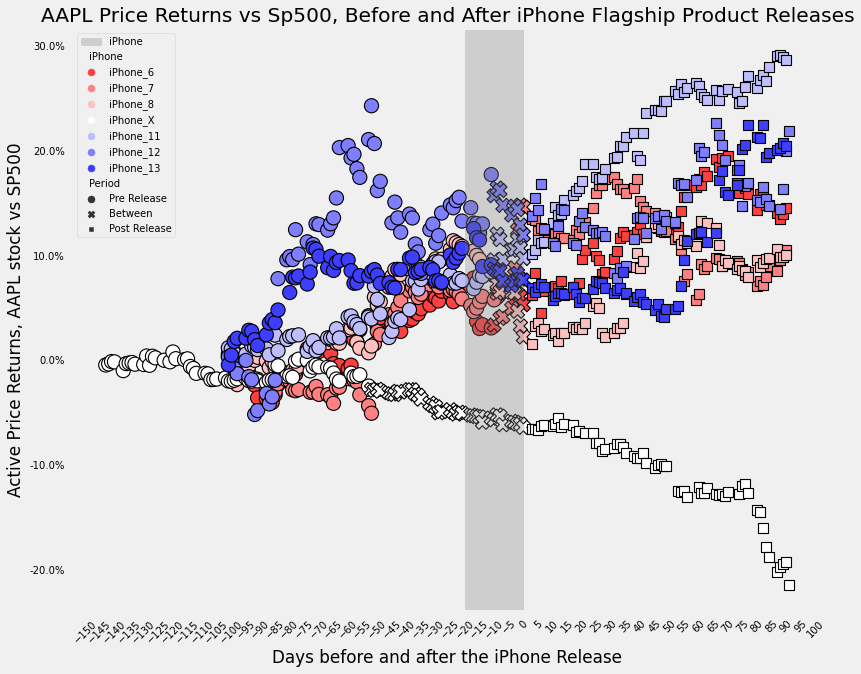

In [989]:



fig, ax = plt.subplots(figsize=(12,10))

plt.xticks(rotation=45)
plt.xticks(np.arange(-150,110, 5))
plt.xlabel('Days before and after the iPhone Release')
plt.grid(False)
plt.title('AAPL Price Returns vs Sp500, Before and After iPhone Flagship Product Releases')
ax.set_ylabel('Active Price Returns, AAPL stock vs SP500')
ax.axvspan(-20,0, label="iPhone", color="gray", alpha=0.3)
ax.yaxis.set_major_formatter('{x:1.1f}%')
sns.color_palette("rocket")
sns.scatterplot(data=sp500_AAPL_df.dropna(), x='Days', y='Active CumSum', edgecolor='black',  
                hue='iPhone',style='Period',palette="bwr_r",s=200)
plt.savefig('iPhone_sp500.png')





## Binning

In [990]:
sp500_AAPL_df.head(2)

,Date,Adj Close,Close,High,Low,Open,Volume,% Return,Cumulative % Return,Date_2,Days,Period,CumSum % Return,iPhone,DATE,SP500,SP500 % 1-Day Return,AAPL % 1-Day Return,Active,Active CumSum
1,2014-06-10,21.198080,23.5625,23.762501,23.3925,23.682501,251108000.0,0.005870,0.005870,2014-06-10,-101,Pre Release,0.586965,iPhone_6,2014-06-10,1950.79,-0.024599,0.586965,0.611564,0.611564
2,2014-06-11,21.110369,23.4650,23.690001,23.3675,23.532499,182724000.0,-0.004138,0.001732,2014-06-11,-100,Pre Release,0.173195,iPhone_6,2014-06-11,1943.89,-0.353703,-0.413770,-0.060067,0.551497


In [991]:
labels=['>100 Days Before', '90 Days Before', '80 Days Before', '70 Days Before', '60 Days Before',
       '50 Days Before', '40 Days Before', '30 Days Before', '20 Days Before', '10 Days Before',
       '0 Days Before', '10 Days After', '20 Days After', '30 Days After', '40 Days After', '50 Days After', '60 Days After', '70 Days After', '>80 Days After']
sp500_AAPL_df['ten_day_cohort'] = pd.qcut(sp500_AAPL_df['Days'], 19, labels=labels)
sp500_AAPL_df['ten_day_cohort'].value_counts().sort_index()

>100 Days Before    56
90 Days Before      49
80 Days Before      52
70 Days Before      48
60 Days Before      55
50 Days Before      48
40 Days Before      56
30 Days Before      49
20 Days Before      52
10 Days Before      48
0 Days Before       56
10 Days After       49
20 Days After       48
30 Days After       55
40 Days After       49
50 Days After       54
60 Days After       50
70 Days After       48
>80 Days After      50
Name: ten_day_cohort, dtype: int64

In [992]:
sp500_AAPL_df.head(2)

,Date,Adj Close,Close,High,Low,Open,Volume,% Return,Cumulative % Return,Date_2,...,Period,CumSum % Return,iPhone,DATE,SP500,SP500 % 1-Day Return,AAPL % 1-Day Return,Active,Active CumSum,ten_day_cohort
1,2014-06-10,21.198080,23.5625,23.762501,23.3925,23.682501,251108000.0,0.005870,0.005870,2014-06-10,...,Pre Release,0.586965,iPhone_6,2014-06-10,1950.79,-0.024599,0.586965,0.611564,0.611564,>100 Days Before
2,2014-06-11,21.110369,23.4650,23.690001,23.3675,23.532499,182724000.0,-0.004138,0.001732,2014-06-11,...,Pre Release,0.173195,iPhone_6,2014-06-11,1943.89,-0.353703,-0.413770,-0.060067,0.551497,>100 Days Before


In [993]:
ten_day_cohorts_AAPL = sp500_AAPL_df.groupby('ten_day_cohort').agg({'AAPL % 1-Day Return': ['mean']})
ten_day_cohorts_AAPL

ten_day_cohorts_SP500 = sp500_AAPL_df.groupby('ten_day_cohort').agg({'SP500 % 1-Day Return': ['mean']})

ten_day_cohorts_active = sp500_AAPL_df.groupby('ten_day_cohort').agg({'Active': ['mean']})
ten_day_cohorts_active

,Active
,mean
ten_day_cohort,
>100 Days Before,-0.079666
90 Days Before,-0.079481
80 Days Before,0.467409
70 Days Before,0.155600
60 Days Before,0.081919
50 Days Before,0.135106
40 Days Before,0.118521
30 Days Before,0.184716


In [995]:
ten_day_cohorts_AAPL_active = ten_day_cohorts_AAPL.join([ten_day_cohorts_SP500,ten_day_cohorts_active])

def negative_red(val):
    color = 'red' if val < 0 else 'green'
    return 'color: %s' % color

def column_bold(val):
    bold = 'bold' if ((val >.2) & (val <1.0)) else ''


    return 'font-weight: %s' % bold



cohorts_styled = ten_day_cohorts_AAPL_active.style.format("{:.2}%").applymap(negative_red).applymap(column_bold).set_caption('AAPL stock tends to outperform SP500 as measured by the avg of 10-day trading cohorts before flagship iPhone product releases')
dfi.export(cohorts_styled,"cohort_returns.png")
cohorts_styled



,AAPL % 1-Day Return,SP500 % 1-Day Return,Active
,mean,mean,mean
ten_day_cohort,,,
>100 Days Before,-0.071%,0.009%,-0.08%
90 Days Before,-0.0019%,0.078%,-0.079%
80 Days Before,0.64%,0.18%,0.47%
70 Days Before,0.25%,0.096%,0.16%
60 Days Before,0.23%,0.15%,0.082%
50 Days Before,-0.089%,-0.22%,0.14%
40 Days Before,0.15%,0.031%,0.12%
30 Days Before,0.31%,0.13%,0.18%


## pandas profiling

In [1000]:
profile = ProfileReport(AAPL_price_subset, title="AAPL prices",explorative=True)
profile.to_file('AAPL_prices.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]

In [1001]:
profile = ProfileReport(sp500_df, title="SP500 prices",explorative=True)
profile.to_file('SP500_prices.html')

Summarize dataset:   0%|          | 0/5 [00:00<?, ?it/s]

Generate report structure:   0%|          | 0/1 [00:00<?, ?it/s]

Render HTML:   0%|          | 0/1 [00:00<?, ?it/s]

Export report to file:   0%|          | 0/1 [00:00<?, ?it/s]